In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    log_loss, confusion_matrix, classification_report,
    roc_auc_score, matthews_corrcoef, cohen_kappa_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from collections import Counter

In [8]:
df = pd.read_csv("Dataset_2_DATA.csv")
display(df)

HHID      PERSID     VPLID       RitID  HH_VALID  P_VALID  KHVM  \
0     30055622  3005562201  13957101  1395710101         2        3     2   
1     30055622  3005562201  13957102  1395710201         2        3     2   
2     30055622  3005562201  13957201  1395720101         2        3     1   
3     30055622  3005562201  13957202  1395720201         2        3     1   
4     30204076  3020407601  14445303  1444530301         2        3     8   
...        ...         ...       ...         ...       ...      ...   ...   
7305  30862294  3086229401  19042304  1904230401         2        3     2   
7306  30862294  3086229401  19042103  1904210301         2        3     7   
7307  30862294  3086229401  19042104  1904210401         2        3     7   
7308  30862294  3086229401  19042201  1904220101         2        3     1   
7309  30862294  3086229401  19042105  1904210501         2        3     1   

      WEGGEWEEST  VERTREKP  AANTVPL  ...  HHAUTO_N  HHAUTO  HHBESTEL  \
0              1         2        2  ...         3       1         0   
1              1         2        2  ...         3       1         0   
2              1         2        4  ...         3       1         0   
3              1         2        4  ...         3       1         0   
4              1         1        3  ...         2       1         1   
...          ...       ...      ...  ...       ...     ...       ...   
7305           1         2       12  ...         1       1         0   
7306           1         2        5  ...         1       1         0   
7307           1         2        5  ...         1       1         0   
7308           1         2        3  ...         1       1         0   
7309           1         2        5  ...         1       1         0   

      HHHYBRID  HHMOTOR  HHBROM  HHSNOR  HHFIETS  HHVOUWFIETS  HHEBIKE  
0            0        1       0       0        1            0        1  
1            0        1       0       0        1            0        1  
2            0        1       0       0        1            0        1  
3            0        1       0       0        1            0        1  
4            0        1       0       0        1            0        1  
...        ...      ...     ...     ...      ...          ...      ...  
7305         0        0       0       0        1            0        0  
7306         0        0       0       0        1            0        0  
7307         0        0       0       0        1            0        0  
7308         0        0       0       0        1            0        0  
7309         0        0       0       0        1            0        0  

[7310 rows x 56 columns]

# Анализ и обработка пропусков/нулевых значений

In [9]:
df = df.replace({' ': np.nan})
missing_values = df.isnull().sum()

missing_values

HHID                        0
PERSID                      0
VPLID                       0
RitID                       0
HH_VALID                    0
P_VALID                     0
KHVM                        0
WEGGEWEEST                  0
VERTREKP                    0
AANTVPL                     0
VPLDAGNR                    0
VERPL                       0
VERPLNR                     0
TOER                        0
TOER_TYPE                   0
AANTRIT                     0
KMOTIEF                     0
VERTPROV                    0
AANKPROV                    0
KAFSTV                      0
KVERTTIJD                   0
KREISDUUR                  81
ROLAUTO                     0
PARKEERKOSTEN              21
VERTRAGING                  0
DAGSOORT                    0
OORDEEL_AUTO                0
OORDEEL_TREIN               0
OORDEEL_BTM                 0
OORDEEL_FIETS               0
OORDEEL_BROMMER             0
OORDEEL_LOPEN               0
GEBRUIK_AUTO_STELLING3      0
GEBRUIK_AUTO_STELLING4      0
GEBRUIK_TREIN_STELLING3     0
GEBRUIK_TREIN_STELLING4     0
GEBRUIK_BTM_STELLING3       0
GEBRUIK_BTM_STELLING4       0
GEBRUIK_FIETS_STELLING2     0
GEBRUIK_FIETS_STELLING3     0
GEBRUIK_LOPEN_STELLING3     0
GEBRUIK_LOPEN_STELLING4     0
HHPERS                      0
HHSAM                       0
N_KIND                      0
HHBRUTOINK2_w5              0
HHAUTO_N                    0
HHAUTO                      0
HHBESTEL                    0
HHHYBRID                    0
HHMOTOR                     0
HHBROM                      0
HHSNOR                      0
HHFIETS                     0
HHVOUWFIETS                 0
HHEBIKE                     0
dtype: int64

Пропуски в двух столбцах. Столбец KREISDUUR содержит информацию о времени поездки. Столбец PARKEERKOSTEN содержит информацию о цене парковки. Оба столбца категориальные (закодированы номерами категорий), можно заменить на моду

In [10]:
mode_value = df['KREISDUUR'].mode()[0]
df['KREISDUUR'] = df['KREISDUUR'].fillna(mode_value)

mode_value1 = df['PARKEERKOSTEN'].mode()[0]
df['PARKEERKOSTEN'] = df['PARKEERKOSTEN'].fillna(mode_value1)

df['KREISDUUR'] = df['KREISDUUR'].astype('int64')
df['PARKEERKOSTEN'] = df['PARKEERKOSTEN'].astype('int64')

In [11]:
df_replaced = df.replace(0, np.nan)
missing_values = df_replaced.isnull().sum()

missing_values

HHID                          0
PERSID                        0
VPLID                         0
RitID                         0
HH_VALID                      0
P_VALID                       0
KHVM                          0
WEGGEWEEST                    0
VERTREKP                      0
AANTVPL                       0
VPLDAGNR                      2
VERPL                      1395
VERPLNR                       0
TOER                       6953
TOER_TYPE                     0
AANTRIT                       0
KMOTIEF                       0
VERTPROV                    109
AANKPROV                    102
KAFSTV                        0
KVERTTIJD                     0
KREISDUUR                     0
ROLAUTO                    4728
PARKEERKOSTEN              7207
VERTRAGING                 6946
DAGSOORT                      0
OORDEEL_AUTO                  0
OORDEEL_TREIN                 0
OORDEEL_BTM                   0
OORDEEL_FIETS                 0
OORDEEL_BROMMER               0
OORDEEL_LOPEN                 0
GEBRUIK_AUTO_STELLING3        0
GEBRUIK_AUTO_STELLING4        0
GEBRUIK_TREIN_STELLING3       0
GEBRUIK_TREIN_STELLING4       0
GEBRUIK_BTM_STELLING3         0
GEBRUIK_BTM_STELLING4         0
GEBRUIK_FIETS_STELLING2       0
GEBRUIK_FIETS_STELLING3       0
GEBRUIK_LOPEN_STELLING3       0
GEBRUIK_LOPEN_STELLING4       0
HHPERS                        0
HHSAM                         0
N_KIND                     6075
HHBRUTOINK2_w5                0
HHAUTO_N                   1430
HHAUTO                     1715
HHBESTEL                   7041
HHHYBRID                   6940
HHMOTOR                    6848
HHBROM                     6894
HHSNOR                     6849
HHFIETS                    1301
HHVOUWFIETS                6830
HHEBIKE                    5412
dtype: int64

Довольно много нулевых значений в некоторых колонках. Проверяем их смысл по описанию датасета:
   1. VPLDAGNR: запись до начала отсчёта
   2. VERPL: отсутствие поездки
   3. TOER: точка отъезда не совпадает с точкой прибытия
   4. VERTPROV: точка отправления не в Нидерландах
   5. AANKPROV: точка прибытия не в Нидерландах
   6. ROLAUTHHBESTELO: поездка не на автомобиле
   7. VERTRAGING: без опозданий
   8. N_KIND: количество детей до 12 лет в домовладении
   9. HHAUTO_N: количество автомобилей в домовладении
   10. HHAUTO: отсутствие автомобилей в домовладении
   11. HHBESTEL: отсутствие фургона в домовладении
   12. HHHYBRID: отсутствие электро/гибридного/водородного автомобиля в домовладении
   13. HHMOTOR: отсутствие мотоцилка в домовладении
   14. HHBROM: отсутствие мопеда в домовладении
   15. HHSNOR: отсутствие легкового мопеда в домовладении
   16. HHFIETS: отсутствие велосипеда в домовладении
   17. HHVOUWFIETS: отсутствие складного велосипеда в домовладении
   18. HHEBIKE: отсутствие электровелосипеда в домовладении

Похоже, в нашем датасете нет пропусков, заполненных нулём. Также вызвали сомнения некоторых колонки, в которых возможно значение 0, но не встречается ни в одной строке. Возможно была проведена предобработка с заполнением пропусков, например, на моду по колонке.

In [12]:
num_duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {num_duplicates}')

Количество дубликатов: 0


In [13]:
df.drop([col for col in df if df[col].nunique()==1], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310 entries, 0 to 7309
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   HHID                     7310 non-null   int64
 1   PERSID                   7310 non-null   int64
 2   VPLID                    7310 non-null   int64
 3   RitID                    7310 non-null   int64
 4   KHVM                     7310 non-null   int64
 5   VERTREKP                 7310 non-null   int64
 6   AANTVPL                  7310 non-null   int64
 7   VPLDAGNR                 7310 non-null   int64
 8   VERPL                    7310 non-null   int64
 9   VERPLNR                  7310 non-null   int64
 10  TOER                     7310 non-null   int64
 11  TOER_TYPE                7310 non-null   int64
 12  AANTRIT                  7310 non-null   int64
 13  KMOTIEF                  7310 non-null   int64
 14  VERTPROV                 7310 non-null   int64
 15  AANK

In [14]:
df = df[df['KAFSTV'] >= 4] # по условию 7 варианта KAFSTV(Distance class trip) больше 3.5 км
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 7309
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   HHID                     4546 non-null   int64
 1   PERSID                   4546 non-null   int64
 2   VPLID                    4546 non-null   int64
 3   RitID                    4546 non-null   int64
 4   KHVM                     4546 non-null   int64
 5   VERTREKP                 4546 non-null   int64
 6   AANTVPL                  4546 non-null   int64
 7   VPLDAGNR                 4546 non-null   int64
 8   VERPL                    4546 non-null   int64
 9   VERPLNR                  4546 non-null   int64
 10  TOER                     4546 non-null   int64
 11  TOER_TYPE                4546 non-null   int64
 12  AANTRIT                  4546 non-null   int64
 13  KMOTIEF                  4546 non-null   int64
 14  VERTPROV                 4546 non-null   int64
 15  AANKPROV 

Датасет причёсан, можно приступать к анализу и обработке

# EDA

Соединим датафреймы, чтобы было удобнее анализировать категории

In [15]:
description_df = pd.read_csv('Dataset_2_DESCRIPTION.csv', encoding='latin1')
description_df

Variable                                    Var_description  \
0                PERSOON                                         new person   
1                PERSOON                                         new person   
2                   HHID                                Unique Household ID   
3                 PERSID                                Unique ID of Person   
4               HH_VALID                       Complete household yes or no   
...                  ...                                                ...   
1054           tramhalte  Straight line distance between nearest tram st...   
1055        bushalte4xpu  Straight line distance between nearest bus sto...   
1056        bushalte2xpu  Straight line distance between nearest bus sto...   
1057        bushalte1xpu  Straight line distance between nearest bus sto...   
1058  bushalteminder1xpu  Straight line distance between nearest bus sto...   

          Value                                              Label  \
0             0                                      no new person   
1             1                                         new person   
2     999999999                                              Input   
3     999999999                                Unique ID of Person   
4             0  Not a complete household, not all persons comp...   
...         ...                                                ...   
1054  999999999  Straight line distance between nearest tram st...   
1055  999999999  Straight line distance between nearest bus sto...   
1056  999999999  Straight line distance between nearest bus sto...   
1057  999999999  Straight line distance between nearest bus sto...   
1058  999999999  Straight line distance between nearest bus sto...   

     Measurement_level   BaseData_Type                  Name_BaseData  \
0              Nominal        Mobility           MPNWAVE6_DAGBOEKdata   
1              Nominal        Mobility           MPNWAVE6_DAGBOEKdata   
2                Scale        Mobility           MPNWAVE6_DAGBOEKdata   
3                Scale        Mobility           MPNWAVE6_DAGBOEKdata   
4              Nominal        Mobility           MPNWAVE6_DAGBOEKdata   
...                ...             ...                            ...   
1054             Scale  Data_HouseHold  MPNWAVE6_HHdata_North-Holland   
1055             Scale  Data_HouseHold  MPNWAVE6_HHdata_North-Holland   
1056             Scale  Data_HouseHold  MPNWAVE6_HHdata_North-Holland   
1057             Scale  Data_HouseHold  MPNWAVE6_HHdata_North-Holland   
1058             Scale  Data_HouseHold  MPNWAVE6_HHdata_North-Holland   

      Filter_Variables  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
1054                 0  
1055                 0  
1056                 0  
1057                 0  
1058                 0  

[1059 rows x 8 columns]

In [16]:
df_new = df.copy()

for column in df_new.columns:
    if column in description_df['Variable'].values:
        label_mapping = dict(zip(description_df[description_df['Variable'] == column]['Value'],
                                  description_df[description_df['Variable'] == column]['Label']))
        df_new[column] = df_new[column].replace(label_mapping)
df_new

HHID      PERSID     VPLID       RitID              KHVM  \
0     30055622  3005562201  13957101  1395710101  Car as passenger   
1     30055622  3005562201  13957102  1395710201  Car as passenger   
2     30055622  3005562201  13957201  1395720101     Car as driver   
3     30055622  3005562201  13957202  1395720201     Car as driver   
4     30204076  3020407601  14445303  1444530301             Other   
...        ...         ...       ...         ...               ...   
7303  30862294  3086229401  19042203  1904220301           Bicycle   
7304  30862294  3086229401  19042102  1904210201     Car as driver   
7305  30862294  3086229401  19042304  1904230401  Car as passenger   
7308  30862294  3086229401  19042201  1904220101     Car as driver   
7309  30862294  3086229401  19042105  1904210501     Car as driver   

             VERTREKP  AANTVPL                      VPLDAGNR        VERPL  \
0     Another address        2   first day of recorded trips  trip abroad   
1     Another address        2   first day of recorded trips  trip abroad   
2     Another address        4  second day of recorded trips  trip abroad   
3     Another address        4  second day of recorded trips  trip abroad   
4         Own address        3   third day of recorded trips  trip abroad   
...               ...      ...                           ...          ...   
7303  Another address        3  second day of recorded trips     new trip   
7304  Another address        5   first day of recorded trips     new trip   
7305  Another address       12   third day of recorded trips     new trip   
7308  Another address        3  second day of recorded trips     new trip   
7309  Another address        5   first day of recorded trips     new trip   

      VERPLNR  ... HHAUTO_N HHAUTO  HHBESTEL HHHYBRID HHMOTOR HHBROM HHSNOR  \
0           1  ...        3    Yes        No       No     Yes     No     No   
1           2  ...        3    Yes        No       No     Yes     No     No   
2           1  ...        3    Yes        No       No     Yes     No     No   
3           2  ...        3    Yes        No       No     Yes     No     No   
4           3  ...        2    Yes       Yes       No     Yes     No     No   
...       ...  ...      ...    ...       ...      ...     ...    ...    ...   
7303        3  ...        1    Yes        No       No      No     No     No   
7304        2  ...        1    Yes        No       No      No     No     No   
7305        4  ...        1    Yes        No       No      No     No     No   
7308        1  ...        1    Yes        No       No      No     No     No   
7309        5  ...        1    Yes        No       No      No     No     No   

     HHFIETS HHVOUWFIETS HHEBIKE  
0        Yes          No     Yes  
1        Yes          No     Yes  
2        Yes          No     Yes  
3        Yes          No     Yes  
4        Yes          No     Yes  
...      ...         ...     ...  
7303     Yes          No      No  
7304     Yes          No      No  
7305     Yes          No      No  
7308     Yes          No      No  
7309     Yes          No      No  

[4546 rows x 53 columns]

In [17]:
df_new.describe()

HHID        PERSID         VPLID         RitID      AANTVPL  \
count  4.546000e+03  4.546000e+03  4.546000e+03  4.546000e+03  4546.000000   
mean   3.276092e+07  3.276092e+09  1.751267e+07  1.751267e+09     3.836120   
std    7.644311e+06  7.644311e+08  2.509169e+06  2.509169e+08     2.039916   
min    3.001044e+07  3.001044e+09  1.312210e+07  1.312210e+09     1.000000   
25%    3.043571e+07  3.043571e+09  1.535520e+07  1.535520e+09     2.000000   
50%    3.077181e+07  3.077181e+09  1.749330e+07  1.749330e+09     4.000000   
75%    3.087409e+07  3.087409e+09  1.981210e+07  1.981210e+09     5.000000   
max    6.000036e+07  6.000036e+09  2.169131e+07  2.169131e+09    13.000000   

           VERPLNR      AANTRIT       HHPERS       N_KIND     HHAUTO_N  
count  4546.000000  4546.000000  4546.000000  4546.000000  4546.000000  
mean      2.398812     2.127585     2.318962     0.270568     1.064232  
std       1.648412     1.561923     1.339549     0.702847     0.773779  
min       1.000000     1.000000     1.000000     0.000000     0.000000  
25%       1.000000     1.000000     1.000000     0.000000     1.000000  
50%       2.000000     1.000000     2.000000     0.000000     1.000000  
75%       3.000000     3.000000     3.000000     0.000000     1.000000  
max      13.000000     9.000000     6.000000     4.000000     4.000000

In [18]:
df_khvm = df_new.groupby('KHVM').size().reset_index().rename(columns = {'KHVM': 'Транспорт', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)

fig = px.bar(df_khvm, x='Транспорт', y = 'Количество поездок', text_auto=True)
fig.update_layout(title = {'text': 'Использование видов транспорта', 'x': 0.5})
fig.show()

В таргетной переменной наблюдается дисбаланс классов. Так как разница между классами велика, а представителей самого малочисленного класса мало, прибегать к undersampling или oversampling не хочется, но попробуем, поскольку это учебный проект. Можно использовать модели, которые могут учесть вес классов, при обучении, такие как случайный лес и градиентный бустинг.

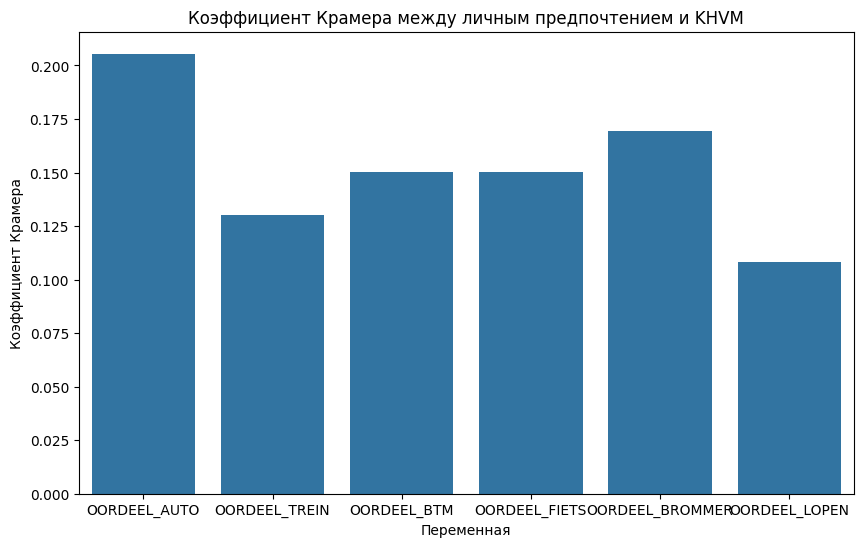

In [19]:
# Функция для вычисления коэффициента Крамера
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2 /= min(k - 1, r - 1)
    return np.sqrt(phi2)

categorical_vars = [
    'OORDEEL_AUTO',
    'OORDEEL_TREIN',
    'OORDEEL_BTM',
    'OORDEEL_FIETS',
    'OORDEEL_BROMMER',
    'OORDEEL_LOPEN'
]

target_var = 'KHVM'

results = []

# Вычисляем коэффициент Крамера для каждой категориальной переменной
for var in categorical_vars:
    v = cramers_v(df_new[var], df_new[target_var])
    results.append({'Переменная': var, 'Коэффициент Крамера': v})
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Переменная', y='Коэффициент Крамера', data=results_df)
plt.title("Коэффициент Крамера между личным предпочтением и KHVM")
plt.show()

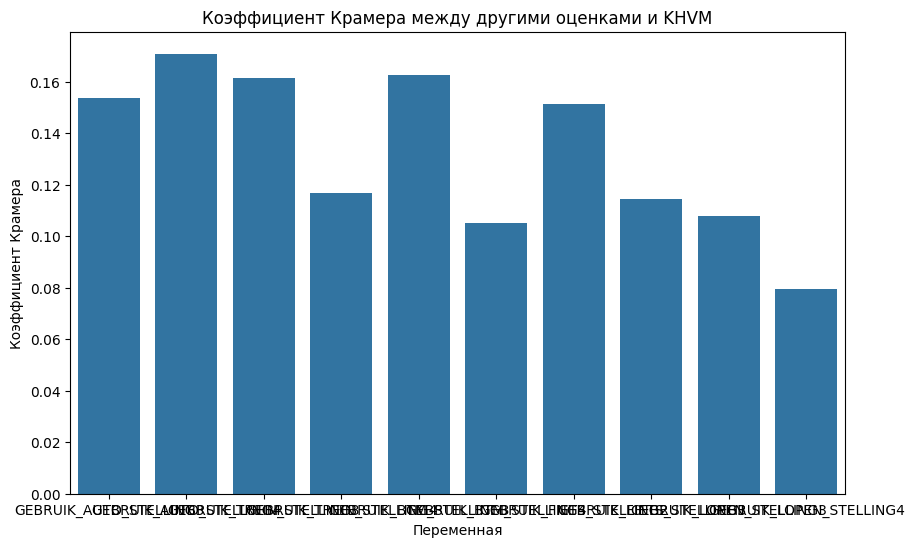

In [20]:
categorical_vars = [
    'GEBRUIK_AUTO_STELLING3',
    'GEBRUIK_AUTO_STELLING4',
    'GEBRUIK_TREIN_STELLING3',
    'GEBRUIK_TREIN_STELLING4',
    'GEBRUIK_BTM_STELLING3',
    'GEBRUIK_BTM_STELLING4',
    'GEBRUIK_FIETS_STELLING2',
    'GEBRUIK_FIETS_STELLING3',
    'GEBRUIK_LOPEN_STELLING3',
    'GEBRUIK_LOPEN_STELLING4'
]

target_var = 'KHVM'

results = []

# Вычисляем коэффициент Крамера для каждой категориальной переменной
for var in categorical_vars:
    v = cramers_v(df_new[var], df_new[target_var])
    results.append({'Переменная': var, 'Коэффициент Крамера': v})
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Переменная', y='Коэффициент Крамера', data=results_df)
plt.title("Коэффициент Крамера между другими оценками и KHVM")
plt.show()

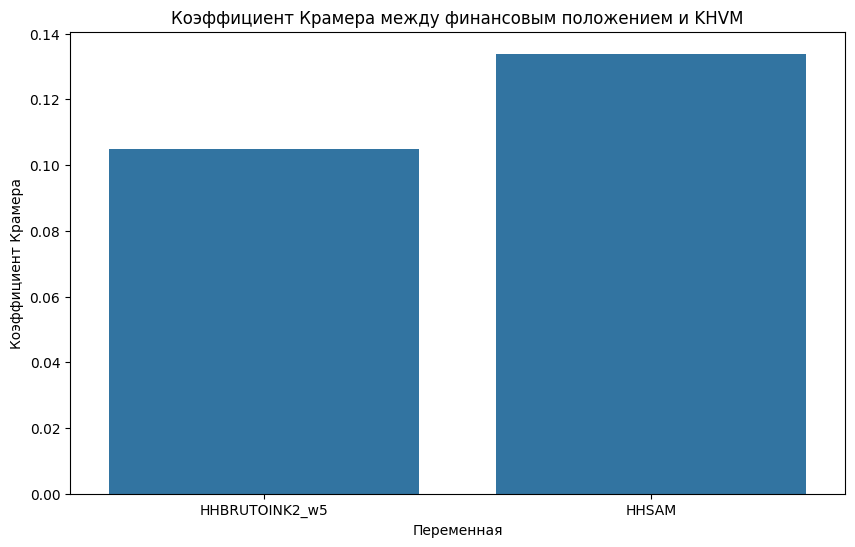

In [21]:
categorical_vars = [
    'HHBRUTOINK2_w5',
    'HHSAM',
]

target_var = 'KHVM'

results = []

# Вычисляем коэффициент Крамера для каждой категориальной переменной
for var in categorical_vars:
    v = cramers_v(df_new[var], df_new[target_var])
    results.append({'Переменная': var, 'Коэффициент Крамера': v})
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Переменная', y='Коэффициент Крамера', data=results_df)
plt.title("Коэффициент Крамера между финансовым положением и KHVM")
plt.show()

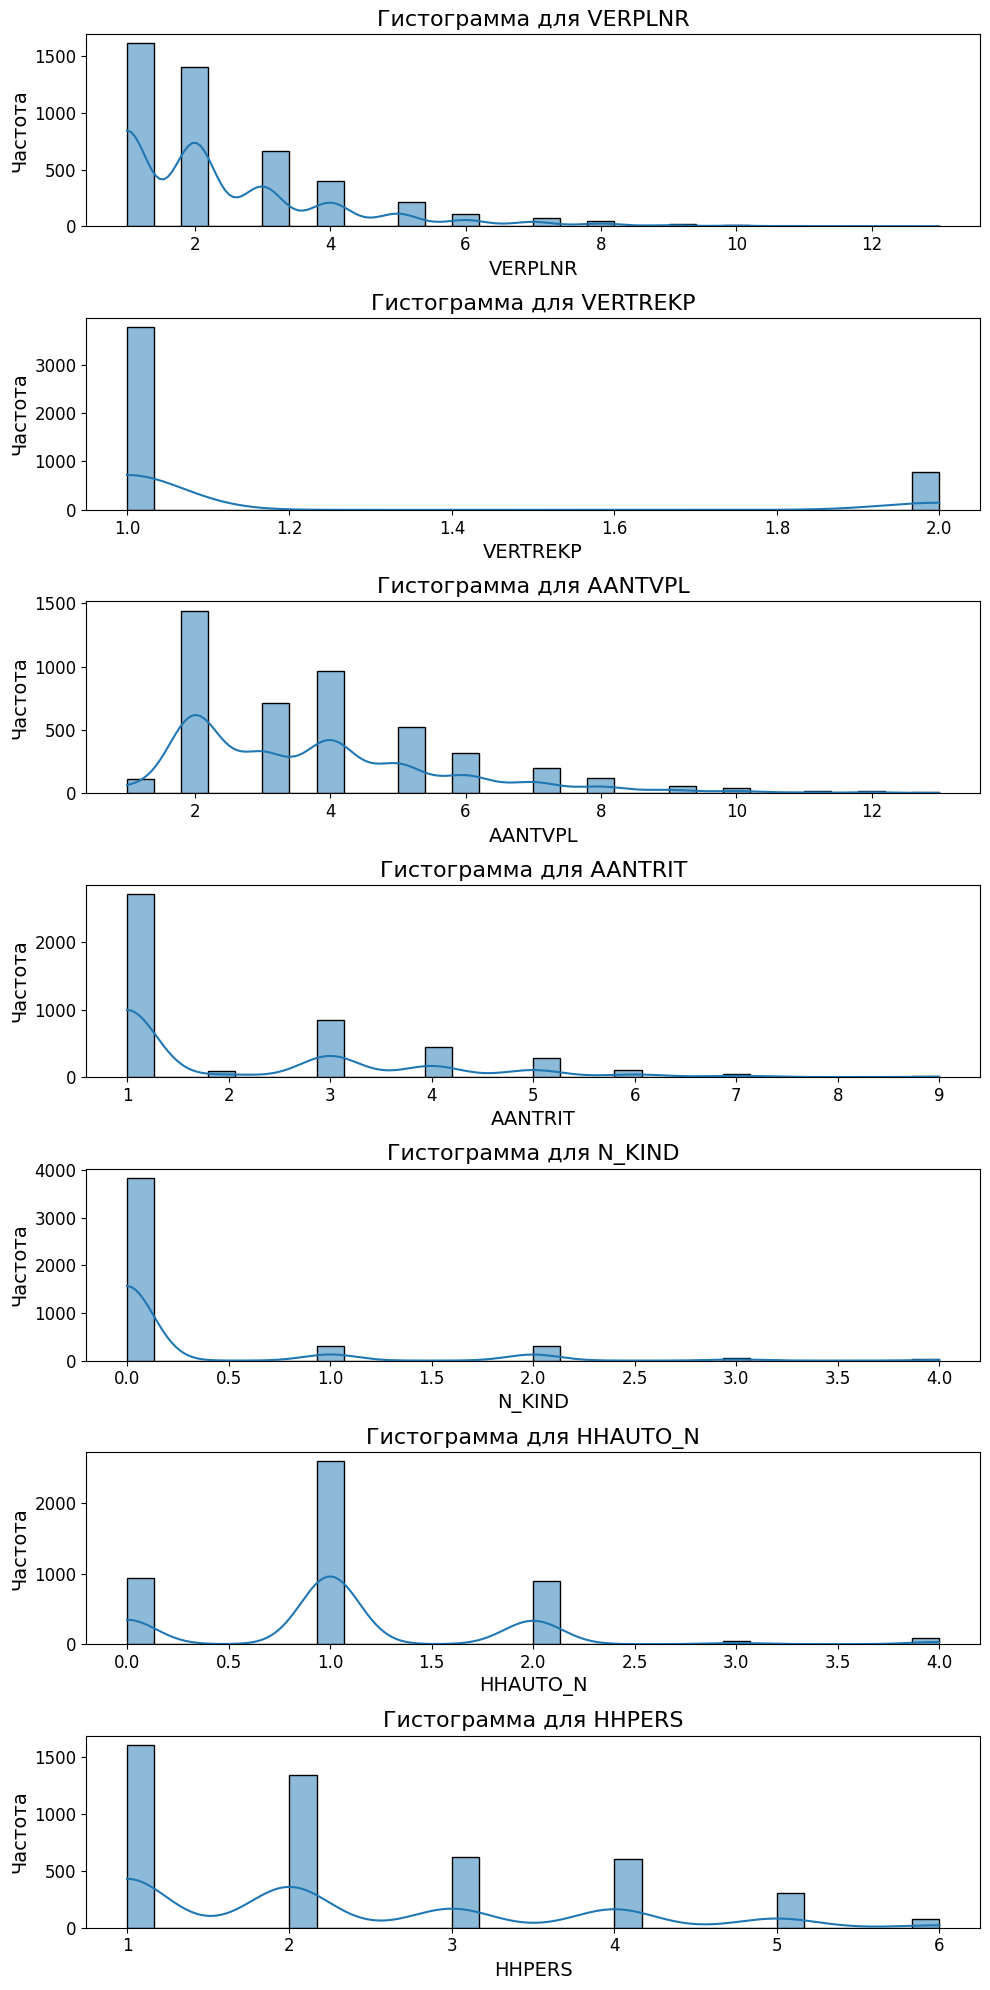

In [22]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(['VERPLNR', 'VERTREKP', 'AANTVPL', 'AANTRIT', 'N_KIND', 'HHAUTO_N', 'HHPERS']):
    plt.subplot(7, 1, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Гистограмма для {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

Распределение не категориальных колонок в датасете

In [23]:
# Список не категориальных колонок
excluded_columns = ['HHID', 'PERSID', 'VPLID', 'RitID', 'VERPLNR', 'VERTREKP', 'AANTVPL',
                    'AANTRIT', 'N_KIND', 'HHAUTO_N', 'HHPERS']

categorical_cols = df.select_dtypes(include=['object', 'category', 'int', 'float']).columns
categorical_cols = [col for col in categorical_cols if col not in excluded_columns]

# DataFrame для коэффициентов корреляции
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# коэффициенты Крамера
for col1 in categorical_cols:
    for col2 in categorical_cols:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

corr_matrix = corr_matrix.astype(float)

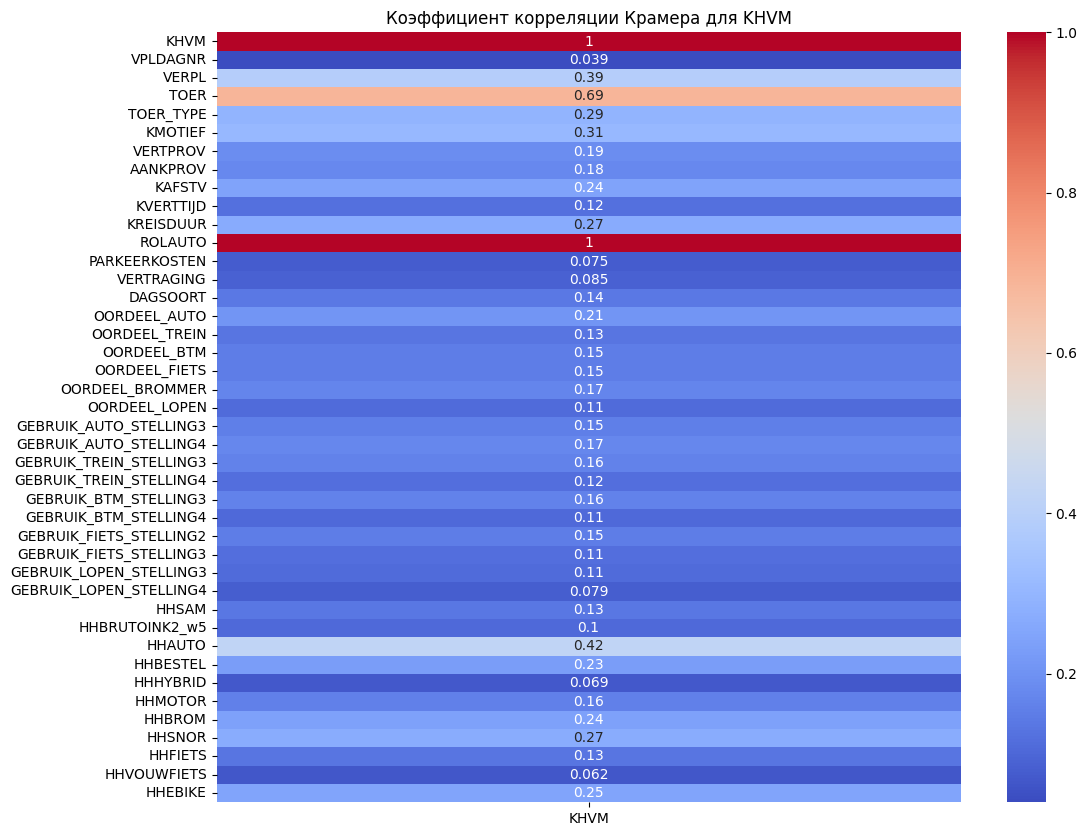

In [24]:
target_variable = 'KHVM'

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[[target_variable]], annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Коэффициент корреляции Крамера для {target_variable}')
plt.show()

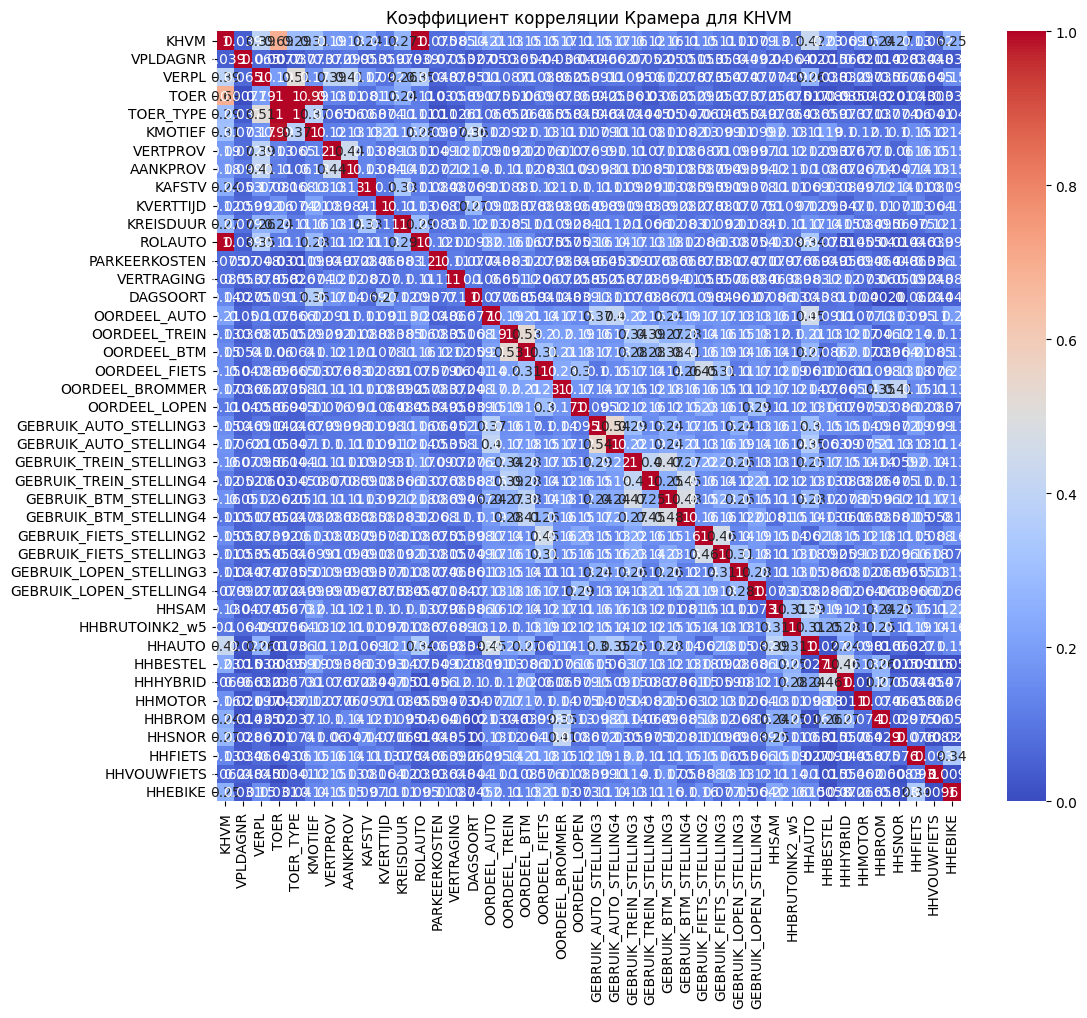

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Коэффициент корреляции Крамера для {target_variable}')
plt.show()

Общая матрица нужна, чтобы отследить, имеется ли заметная корреляция между переменными, отличными от таргетной, чтобы избежать очевидной мультиколлинеарности

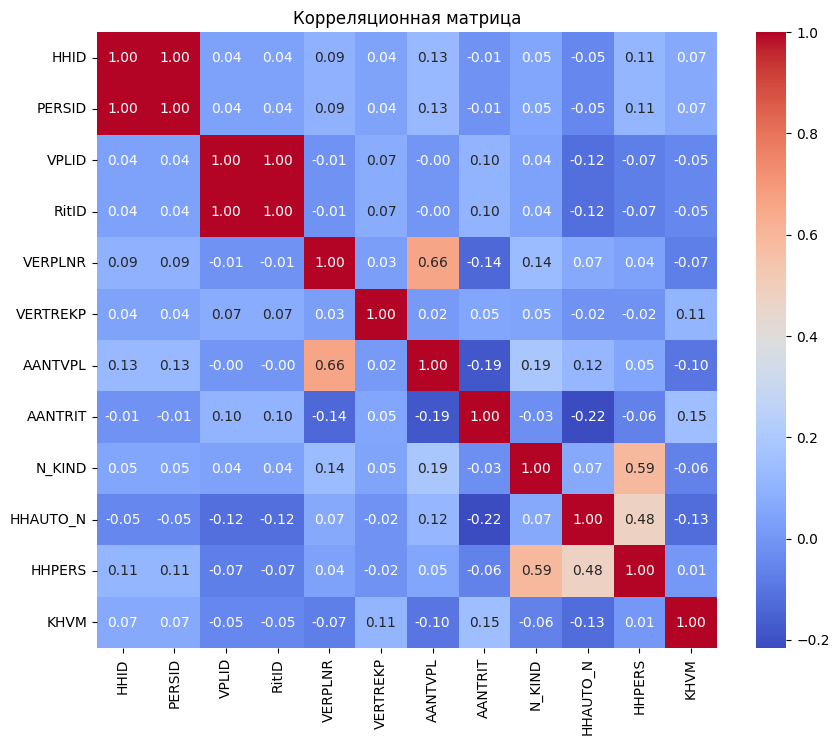

In [26]:
df_filtered = df[excluded_columns]

columns_to_use = excluded_columns.copy()
if 'KHVM' not in columns_to_use:
    columns_to_use.append('KHVM')

df_selected = df[columns_to_use]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Зависимости для численных премененных

# ВАЖНО

Где-то на этом этапе я заметила, что данные из файла с описанием не везде совпадают с содержимым файла с данными, поэтому в процессе обработки данных я могу делать выводы, противоречащие фактическому содержанию датасета. Мне очень не хочется вручную перебирать 56 колонок чуть ли не построчно, чтобы отловить все эти ошибки, надеюсь на понимание

# Генерация новых данных для создания сбалансированных классов

In [27]:
y_true = df['KHVM']

# Словарь для объединения
class_mapping = {
    1: 0,  # Car as driver
    2: 1,  # Car as passenger
    3: 2,  # Train → "Общественный транспорт" (новый класс 1)
    4: 3,  # Bus/tram/metro → "Общественный транспорт"
    5: 4,  # Scooter/moped → "Двухколёсные ТС" (новый класс 2)
    6: 4,  # Bicycle → "Двухколёсные ТС"
    7: 5,  # Walking → "Пешие/Прочее" (новый класс 3)
    8: 5   # Other → "Пешие/Прочее"
}

# Применяем объединение
y_merged = [class_mapping[label] for label in y_true]


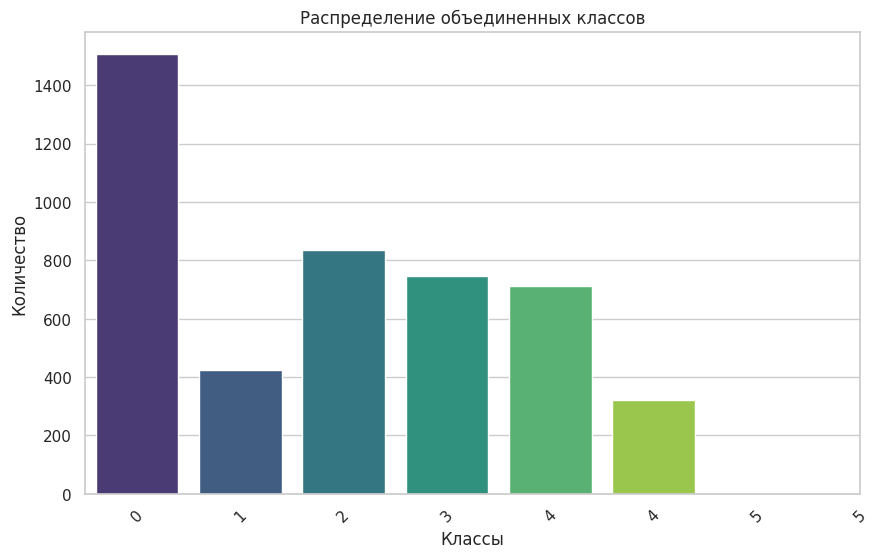

In [28]:
sns.set(style="whitegrid")

# Построим график распределения
plt.figure(figsize=(10, 6))
sns.countplot(x=y_merged, palette='viridis')

# Добавим подписи
plt.title('Распределение объединенных классов')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.xticks(ticks=range(len(class_mapping)), labels=list(class_mapping.values()), rotation=45)

# Показать график
plt.show()

In [29]:
from imblearn.combine import SMOTEENN

X = df.drop('KHVM', axis=1)
y = y_merged
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['KHVM'] = y_resampled

df_khvm = resampled_data.groupby('KHVM').size().reset_index().rename(columns = {'KHVM': 'Транспорт', 0: 'Количество поездок'}).sort_values('Количество поездок', ascending=False)

fig = px.bar(df_khvm, x='Транспорт', y = 'Количество поездок', text_auto=True)
fig.update_layout(title = {'text': 'Использование видов транспорта', 'x': 0.5})
fig.show()

Честно говоря, я не доверяю этому методу, поэтому хочу построить все те же графики для нового датасета. Можно перейти сразу к блоку с анализом результатов

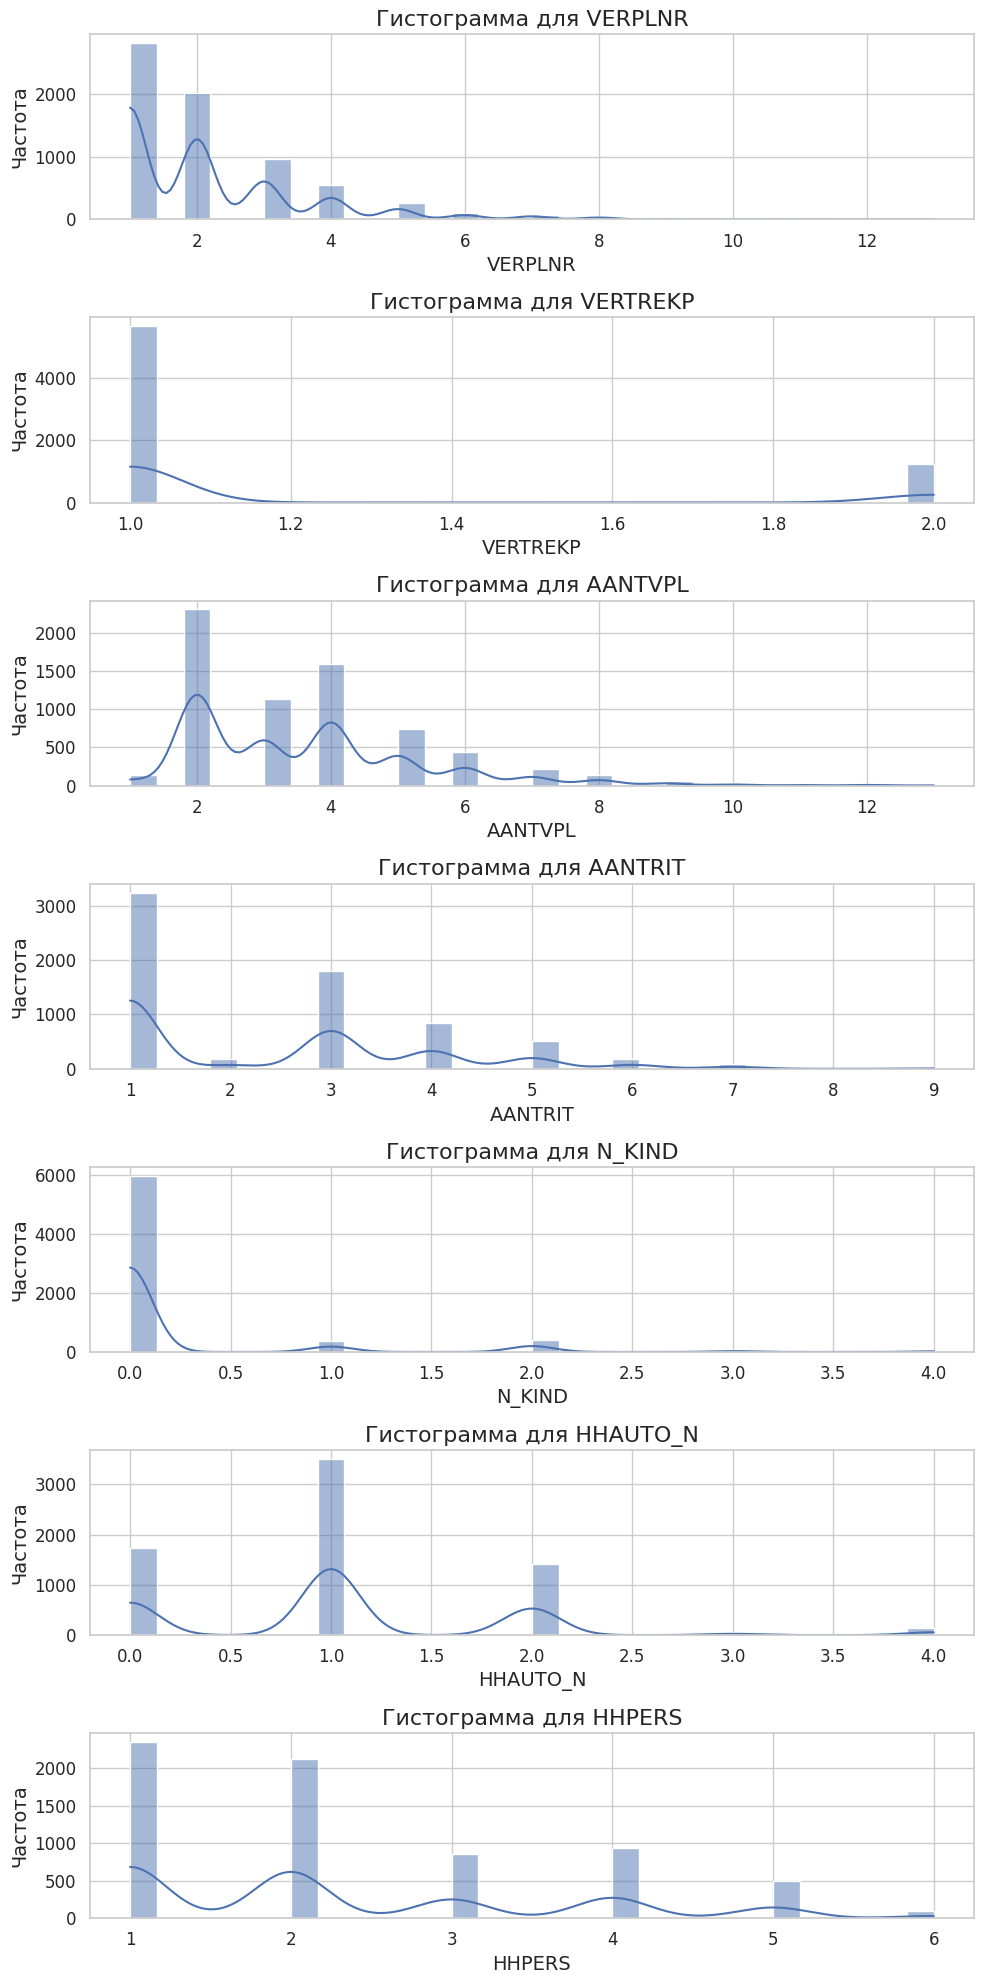

In [30]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(['VERPLNR', 'VERTREKP', 'AANTVPL', 'AANTRIT', 'N_KIND', 'HHAUTO_N', 'HHPERS']):
    plt.subplot(7, 1, i + 1)
    sns.histplot(resampled_data[col], bins=30, kde=True)
    plt.title(f'Гистограмма для {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Частота', fontsize=14)
    plt.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

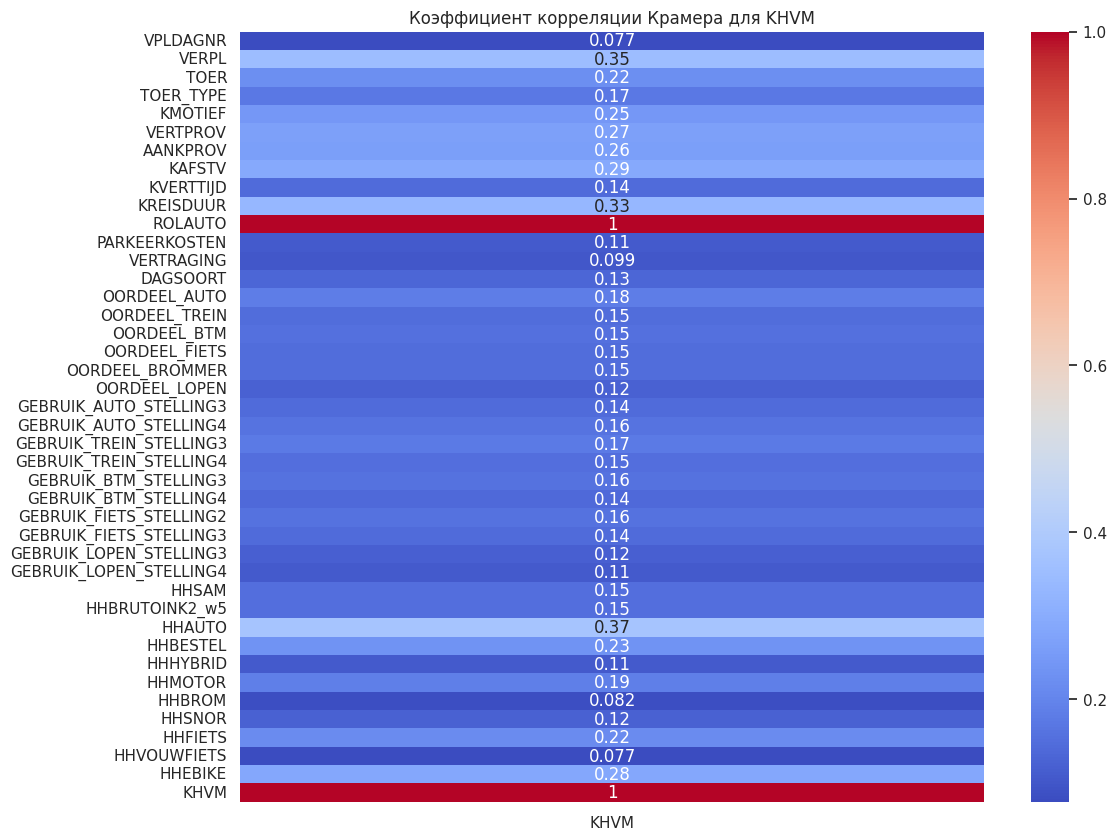

In [31]:
# Список не категориальных колонок
excluded_columns = ['HHID', 'PERSID', 'VPLID', 'RitID', 'VERPLNR', 'VERTREKP', 'AANTVPL',
                    'AANTRIT', 'N_KIND', 'HHAUTO_N', 'HHPERS']

categorical_cols = resampled_data.select_dtypes(include=['object', 'category', 'int', 'float']).columns
categorical_cols = [col for col in categorical_cols if col not in excluded_columns]

# DataFrame для коэффициентов корреляции
corr_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# коэффициенты Крамера
for col1 in categorical_cols:
    for col2 in categorical_cols:
        corr_matrix.loc[col1, col2] = cramers_v(resampled_data[col1], resampled_data[col2])

corr_matrix = corr_matrix.astype(float)

target_variable = 'KHVM'

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[[target_variable]], annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Коэффициент корреляции Крамера для {target_variable}')
plt.show()

Результат схож, можно пользоваться новым датафреймом

Отбор признаков: у нас всего 10 фич с коэффициентом корреляции от 0,3, это где-то 18% от всех данных. Полагаю, между фичами и таргетной переменной могут существовать неочевидные связи, которые нужно очень кропотливо искать. Я планирую попробовать обучить модель на 10 фичах и на всех и сравнить результаты.

# Моделирование

## обучение на всех данных после оверсамплинга

In [32]:
X = resampled_data.drop(columns=['KHVM', 'ROLAUTO', 'HHID', 'PERSID', 'VPLID', 'RitID'])
y = resampled_data['KHVM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Инициализация H2O
h2o.init(max_mem_size='8G')

# Создание H2OFrame
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

h2o_train = h2o.H2OFrame(train_df)
h2o_test = h2o.H2OFrame(test_df)

target = 'KHVM'
h2o_train[target] = h2o_train[target].asfactor()
h2o_test[target] = h2o_test[target].asfactor()

features = list(h2o_train.columns)
features.remove(target)

# Настройка и запуск AutoML
aml = H2OAutoML(
    max_models=10,
    max_runtime_secs=1000,
    seed=42,
    sort_metric='logloss',
    balance_classes=True,
    exclude_algos=['StackedEnsemble', 'DeepLearning']
)
aml.train(x=features, y=target, training_frame=h2o_train, validation_frame=h2o_test)

# Проверка наличия моделей
if aml.leaderboard.nrows == 0:
    print("Ошибка: модели не были построены. Проверьте данные и параметры.")
else:
    print("\nТаблица лидеров:")
    print(aml.leaderboard.head())

    best_model = aml.leader
    print(f"\nЛучшая модель: {best_model.model_id}")

    # Прогнозирование
    preds = best_model.predict(h2o_test).as_data_frame()
    y_true = h2o_test[target].as_data_frame().values.ravel()
    y_pred = preds['predict'].values

    # Расчет метрик
    print("\nМетрики качества:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

    # Матрица ошибок и отчет
    print("\nМатрица ошибок:")
    print(confusion_matrix(y_true, y_pred))

    print("\nОтчет классификации:")
    print(classification_report(y_true, y_pred))

# Завершение работы H2O
h2o.shutdown(prompt=False)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcbezv12j
  JVM stdout: /tmp/tmpcbezv12j/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcbezv12j/h2o_unknownUser_started_from_python.err


KeyboardInterrupt: 

Очень смущает  accuracy = 0,97. Очевидно, модель переобучена, что, вероятно, связано с неправильным выбором входных данных. Пробуем другие

In [ ]:
X = df.drop(columns=['KHVM', 'ROLAUTO', 'HHID', 'PERSID', 'VPLID', 'RitID'])
y = df['KHVM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Инициализация H2O
h2o.init(max_mem_size='8G')

# Создание H2OFrame
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

h2o_train = h2o.H2OFrame(train_df)
h2o_test = h2o.H2OFrame(test_df)

target = 'KHVM'
h2o_train[target] = h2o_train[target].asfactor()
h2o_test[target] = h2o_test[target].asfactor()

features = list(h2o_train.columns)
features.remove(target)

# Настройка и запуск AutoML
aml = H2OAutoML(
    max_models=10,
    max_runtime_secs=1000,
    seed=42,
    sort_metric='logloss',
    balance_classes=True,
    exclude_algos=['StackedEnsemble', 'DeepLearning']
)
aml.train(x=features, y=target, training_frame=h2o_train, validation_frame=h2o_test)

# Проверка наличия моделей
if aml.leaderboard.nrows == 0:
    print("Ошибка: модели не были построены. Проверьте данные и параметры.")
else:
    print("\nТаблица лидеров:")
    print(aml.leaderboard.head())

    best_model = aml.leader
    print(f"\nЛучшая модель: {best_model.model_id}")

    # Прогнозирование
    preds = best_model.predict(h2o_test).as_data_frame()
    y_true = h2o_test[target].as_data_frame().values.ravel()
    y_pred = preds['predict'].values

    # Расчет метрик
    print("\nМетрики качества:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

    # Матрица ошибок и отчет
    print("\nМатрица ошибок:")
    print(confusion_matrix(y_true, y_pred))

    print("\nОтчет классификации:")
    print(classification_report(y_true, y_pred))

# Завершение работы H2O
h2o.shutdown(prompt=False)

Лучше, но всё ещё много, попробуем на переменных с хорошими коэффициентами корреляции

In [33]:
columns_to_use = ['VERTREKP', 'AANTRIT', 'VERPL', 'TOER', 'KMOTIEF', 'TOER_TYPE',
                 'HHAUTO', 'HHBESTEL', 'HHBROM', 'HHSNOR', 'HHEBIKE']

X = resampled_data[columns_to_use]
y = resampled_data['KHVM']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

# Инициализация H2O
h2o.init(max_mem_size='8G')

# Создание H2OFrame
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

h2o_train = h2o.H2OFrame(train_df)
h2o_test = h2o.H2OFrame(test_df)

target = 'KHVM'
h2o_train[target] = h2o_train[target].asfactor()
h2o_test[target] = h2o_test[target].asfactor()

features = list(h2o_train.columns)
features.remove(target)

# Настройка и запуск AutoML
aml = H2OAutoML(
    max_models=10,
    max_runtime_secs=1000,
    seed=42,
    sort_metric='logloss',
    balance_classes=True,
    exclude_algos=['StackedEnsemble', 'DeepLearning']
)
aml.train(x=features, y=target, training_frame=h2o_train, validation_frame=h2o_test)

# Проверка наличия моделей
if aml.leaderboard.nrows == 0:
    print("Ошибка: модели не были построены. Проверьте данные и параметры.")
else:
    print("\nТаблица лидеров:")
    print(aml.leaderboard.head())

    best_model = aml.leader
    print(f"\nЛучшая модель: {best_model.model_id}")

    # Прогнозирование
    preds = best_model.predict(h2o_test).as_data_frame()
    y_true = h2o_test[target].as_data_frame().values.ravel()
    y_pred = preds['predict'].values

    # Расчет метрик классификации
    print("\nМетрики качества:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

    print("\nМатрица ошибок:")
    print(confusion_matrix(y_true, y_pred))

    print("\nОтчет классификации:")
    print(classification_report(y_true, y_pred))

# Завершение работы H2O
h2o.shutdown(prompt=False)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         37 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.7
H2O_cluster_version_age:    2 months and 10 days
H2O_cluster_name:           H2O_from_python_unknownUser_i57v6g
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    8 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.11.13 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
11:33:46.225: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%

Таблица лидеров:
model_id                              logloss    mean_per_class_error      rmse       mse
GBM_3_AutoML_1_20250607_113346       0.65596                 0.316716  0.479773  0.230182
GBM_2_AutoML_1_20250607_113346       0.65864                 0.313509  0.480856  0.231223
GBM_4_AutoML_1_20250607_113346       0.66383                 0.319155  0.48179   0.232122
XGBoost_3_AutoML_1_20250607_113346   0.682202                0.


accuracy = 0,70, что очень похоже на справедливое решение для AutoML без глубокого обучения. Вывод: oversampling всё же влияет на результат обучения, но незначительно. Лишние переменные выбрасываем, дальше будем работать со столбцами из списка columns_to_use

# Собственная модель

## попробую сделать ансамбль из логистической регрессии, дерева решений и случайного леса

In [34]:
columns_to_use = ['VERTREKP', 'AANTRIT', 'VERPL', 'TOER', 'KMOTIEF', 'TOER_TYPE',
                            'HHAUTO', 'HHBESTEL', 'HHBROM', 'HHSNOR', 'HHEBIKE']

X = resampled_data[columns_to_use]
y = resampled_data['KHVM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42, shuffle=True)

In [35]:
# логистическая регрессия

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2', 'none'],

}
grid = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=500), param_grid, cv=5)
cv_scores = cross_val_score(grid, X_train_scaled, y_train, cv=5)

grid.fit(X_train_scaled, y_train)

best_model = grid.best_estimator_

best_params1 = grid.best_params_

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f'Best Hyperparameters: {best_params1}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.52
Confusion Matrix:
[[125  40   0   0  29   3]
 [118  17   4   2  35  14]
 [  0   0 182 101   0   9]
 [  0   0  71 205   0  15]
 [ 87  18   0   2  61  31]
 [  3  14  19   9  34 124]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.63      0.47       197
           1       0.19      0.09      0.12       190
           2       0.66      0.62      0.64       292
           3       0.64      0.70      0.67       291
           4       0.38      0.31      0.34       199
           5       0.63      0.61      0.62       203

    accuracy                           0.52      1372
   macro avg       0.48      0.49      0.48      1372
weighted avg       0.51      0.52      0.50      1372



In [36]:
from IPython.display import display, Math

formula = r"""
P(y=1 \mid \mathbf{x}) = \frac{1}{1 + e^{-\left(\sum_{i=1}^n w_i x_i + b\right)}}
"""

display(Math(formula))

<IPython.core.display.Math object>

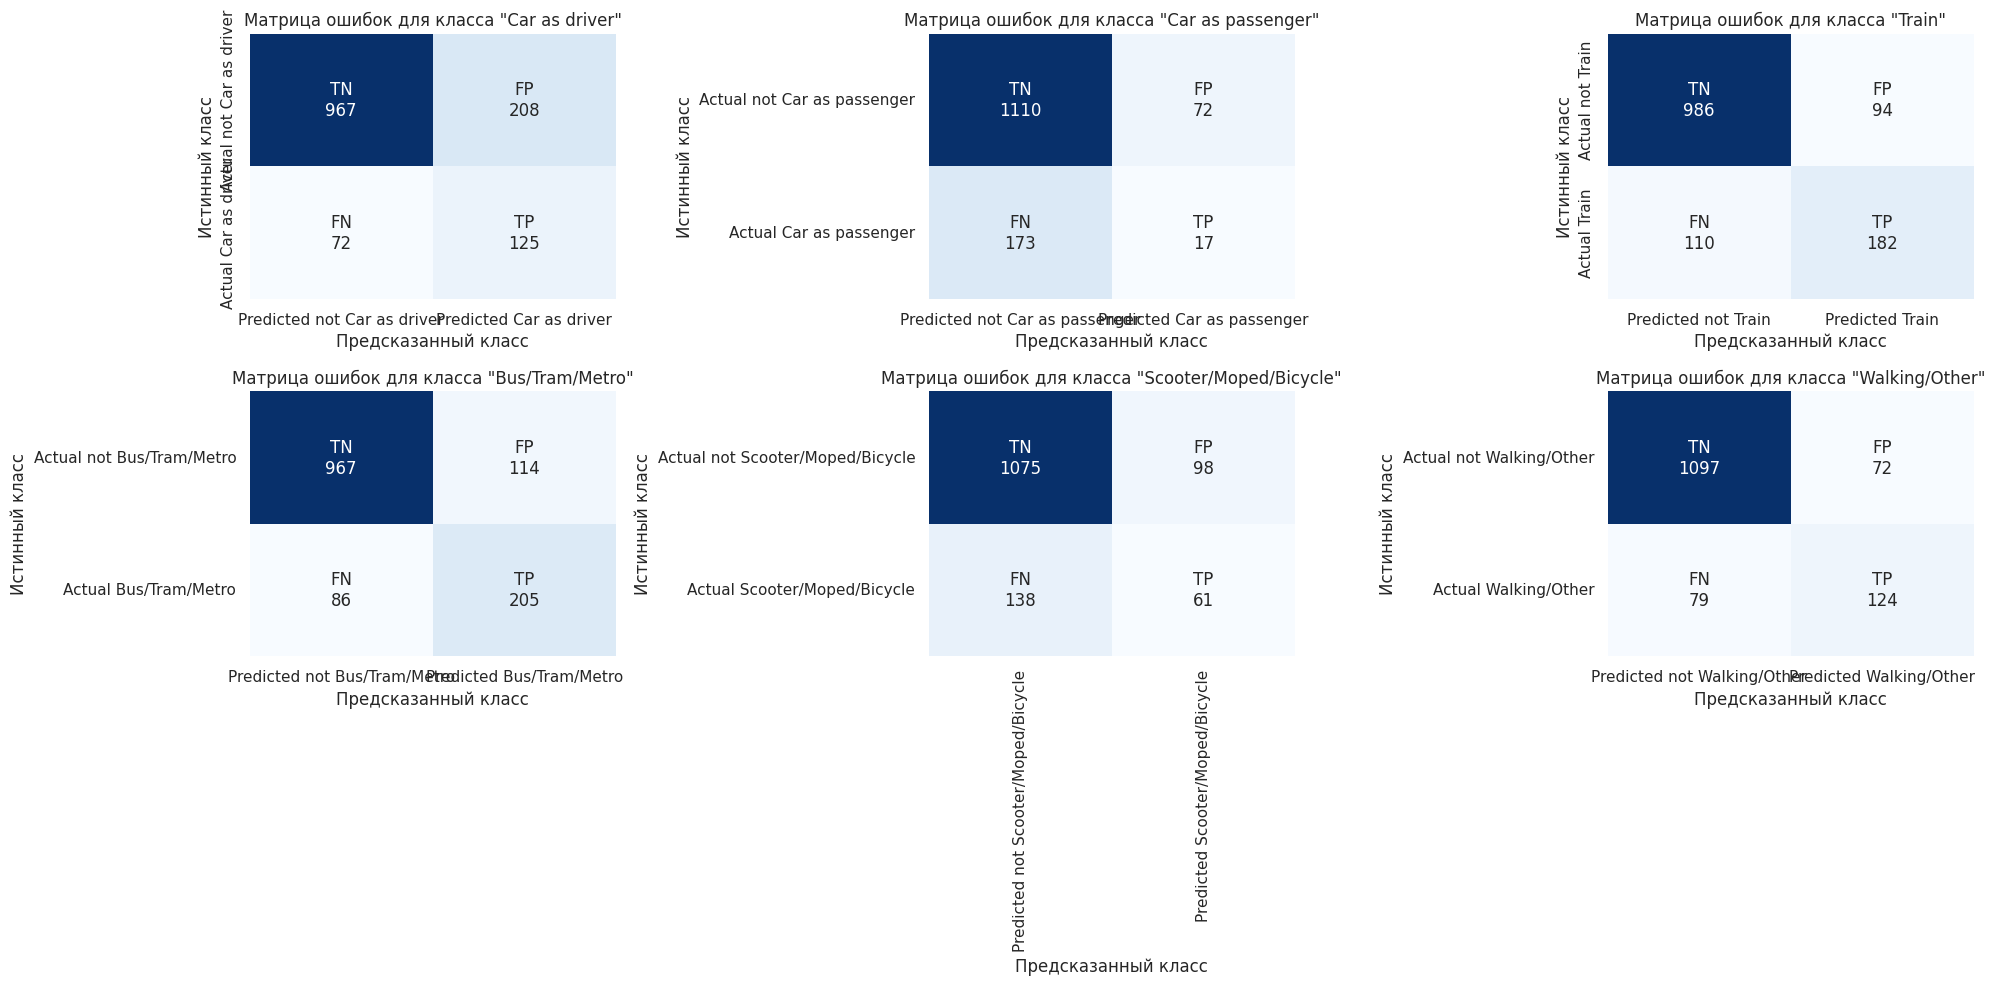

In [37]:
class_names = [
    'Car as driver',
    'Car as passenger',
    'Train',
    'Bus/Tram/Metro',
    'Scooter/Moped/Bicycle',
    'Walking/Other'
]

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i in range(6):
    # Бинаризация меток для текущего класса
    y_true_binary = [1 if y == i else 0 for y in y_true]
    y_pred_binary = [1 if y == i else 0 for y in y_pred]

    # Вычисляем confusion matrix с фиксированными метками [0,1]
    cm = confusion_matrix(y_true_binary, y_pred_binary, labels=[0, 1])

    # Если cm не 2x2 (например, отсутствуют какие-то метки), создаём пустую матрицу 2x2
    if cm.shape != (2, 2):
        cm_full = np.zeros((2, 2), dtype=int)
        for r in range(cm.shape[0]):
            for c in range(cm.shape[1]):
                cm_full[r, c] = cm[r, c]
        cm = cm_full

    TN, FP, FN, TP = cm.ravel()

    labels = np.array([
        [f'TN\n{TN}', f'FP\n{FP}'],
        [f'FN\n{FN}', f'TP\n{TP}']
    ])

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
                ax=axes[i],
                xticklabels=[f'Predicted not {class_names[i]}', f'Predicted {class_names[i]}'],
                yticklabels=[f'Actual not {class_names[i]}', f'Actual {class_names[i]}'])

    axes[i].set_xlabel('Предсказанный класс')
    axes[i].set_ylabel('Истинный класс')
    axes[i].set_title(f'Матрица ошибок для класса "{class_names[i]}"')

plt.tight_layout()
plt.show()

In [38]:
# дерево решений

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Настройка гиперпараметров для дерева решений
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Лучшая модель
best_model = grid.best_estimator_

# Получение отобранных гиперпараметров и сохранение их в переменной
best_params2 = grid.best_params_

# Прогнозирование на тестовых данных
y_pred = best_model.predict(X_test_scaled)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Best Hyperparameters: {best_params2}')  # Вывод отобранных гиперпараметров
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.70
Confusion Matrix:
[[128  42   0   0  26   1]
 [ 35 118   3   0  24  10]
 [  0   0 232  58   2   0]
 [  0   0  51 239   1   0]
 [ 37  41   0   4 106  11]
 [ 12  12  10   7  18 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.65      0.63       197
           1       0.55      0.62      0.59       190
           2       0.78      0.79      0.79       292
           3       0.78      0.82      0.80       291
           4       0.60      0.53      0.56       199
           5       0.87      0.71      0.78       203

    accuracy                           0.70      1372
   macro avg       0.70      0.69      0.69      1372
weighted avg       0.71      0.70      0.71      1372



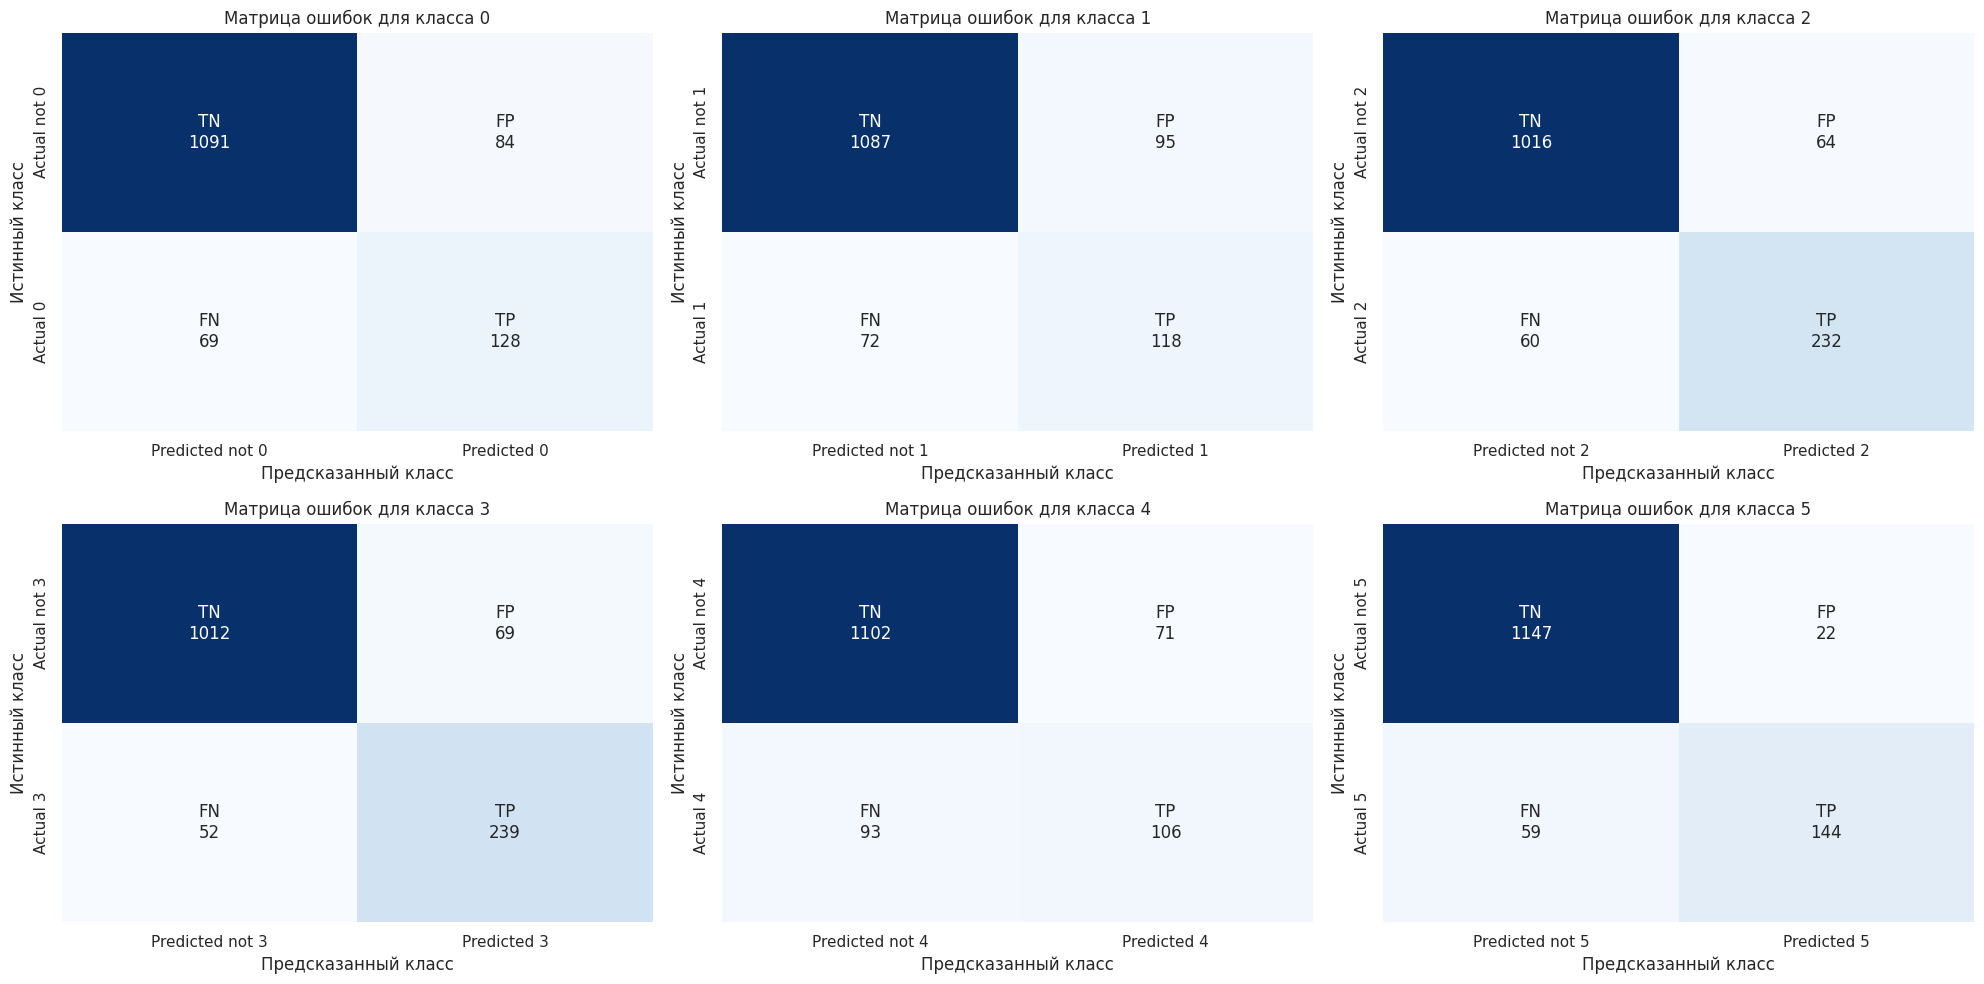

In [39]:
num_classes = 6

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i in range(num_classes):
    y_true_binary = [1 if y == i else 0 for y in y_true]
    y_pred_binary = [1 if y == i else 0 for y in y_pred]

    cm = confusion_matrix(y_true_binary, y_pred_binary, labels=[0,1])

    # Убедимся, что cm - 2x2
    if cm.shape != (2,2):
        # Создаем пустую матрицу 2x2 и копируем туда cm
        cm_full = np.zeros((2,2), dtype=int)
        for r in range(cm.shape[0]):
            for c in range(cm.shape[1]):
                cm_full[r,c] = cm[r,c]
        cm = cm_full

    TN, FP, FN, TP = cm.ravel()

    labels = np.array([
        [f'TN\n{TN}', f'FP\n{FP}'],
        [f'FN\n{FN}', f'TP\n{TP}']
    ])

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
                ax=axes[i],
                xticklabels=['Predicted not ' + str(i), 'Predicted ' + str(i)],
                yticklabels=['Actual not ' + str(i), 'Actual ' + str(i)])

    axes[i].set_xlabel('Предсказанный класс')
    axes[i].set_ylabel('Истинный класс')
    axes[i].set_title(f'Матрица ошибок для класса {i}')

plt.tight_layout()
plt.show()

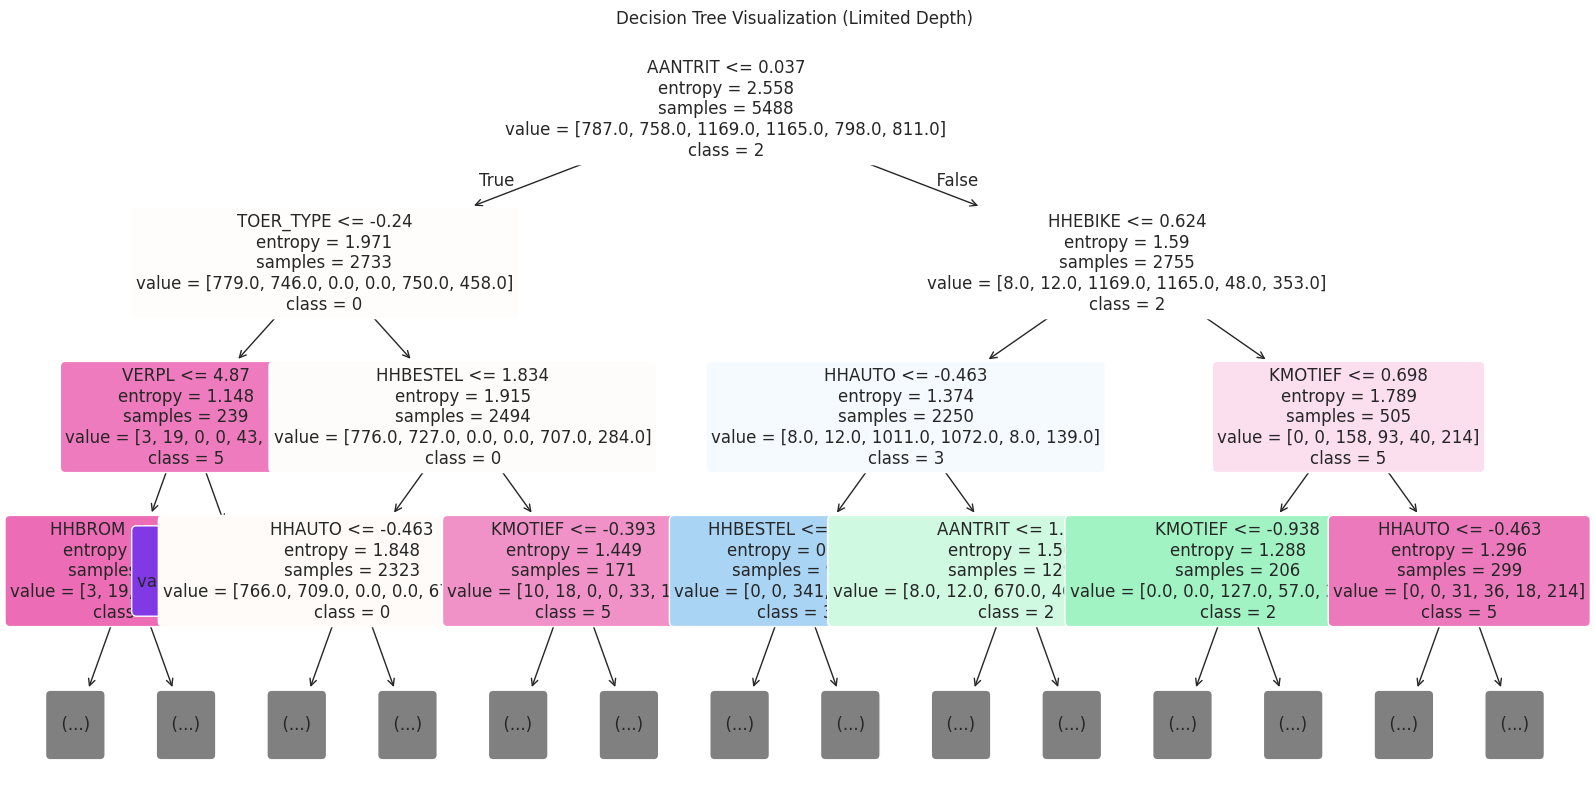

In [40]:
from sklearn.tree import plot_tree

# Визуализация дерева решений
plt.figure(figsize=(20,10))
plot_tree(best_model,
          max_depth=3,
          feature_names=X_train.columns if hasattr(X_train, 'columns') else None,
          class_names=[str(cls) for cls in best_model.classes_],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

dot_data = export_graphviz(best_model,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=[str(cls) for cls in best_model.classes_],
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

# Сохранение в PDF
graph.render("decision_tree", format='pdf')
graph.view()

'decision_tree.pdf'

In [42]:
# случайный лес

# Масштабирование признаков (не обязательно для случайного леса, но может быть полезно)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Настройка гиперпараметров для случайного леса
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

# Лучшая модель
best_model = grid.best_estimator_

# Получение отобранных гиперпараметров и сохранение их в переменной
best_params3 = grid.best_params_

# Прогнозирование на тестовых данных
y_pred = best_model.predict(X_test_scaled)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print(f'Best Hyperparameters: {best_params3}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.70
Confusion Matrix:
[[121  42   0   0  32   2]
 [ 34 120   2   1  25   8]
 [  0   0 227  63   2   0]
 [  0   0  51 233   7   0]
 [ 32  38   0   2 116  11]
 [  5  10   9   7  24 148]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       197
           1       0.57      0.63      0.60       190
           2       0.79      0.78      0.78       292
           3       0.76      0.80      0.78       291
           4       0.56      0.58      0.57       199
           5       0.88      0.73      0.80       203

    accuracy                           0.70      1372
   macro avg       0.70      0.69      0.69      1372
weighted avg       0.71      0.70      0.71      1372



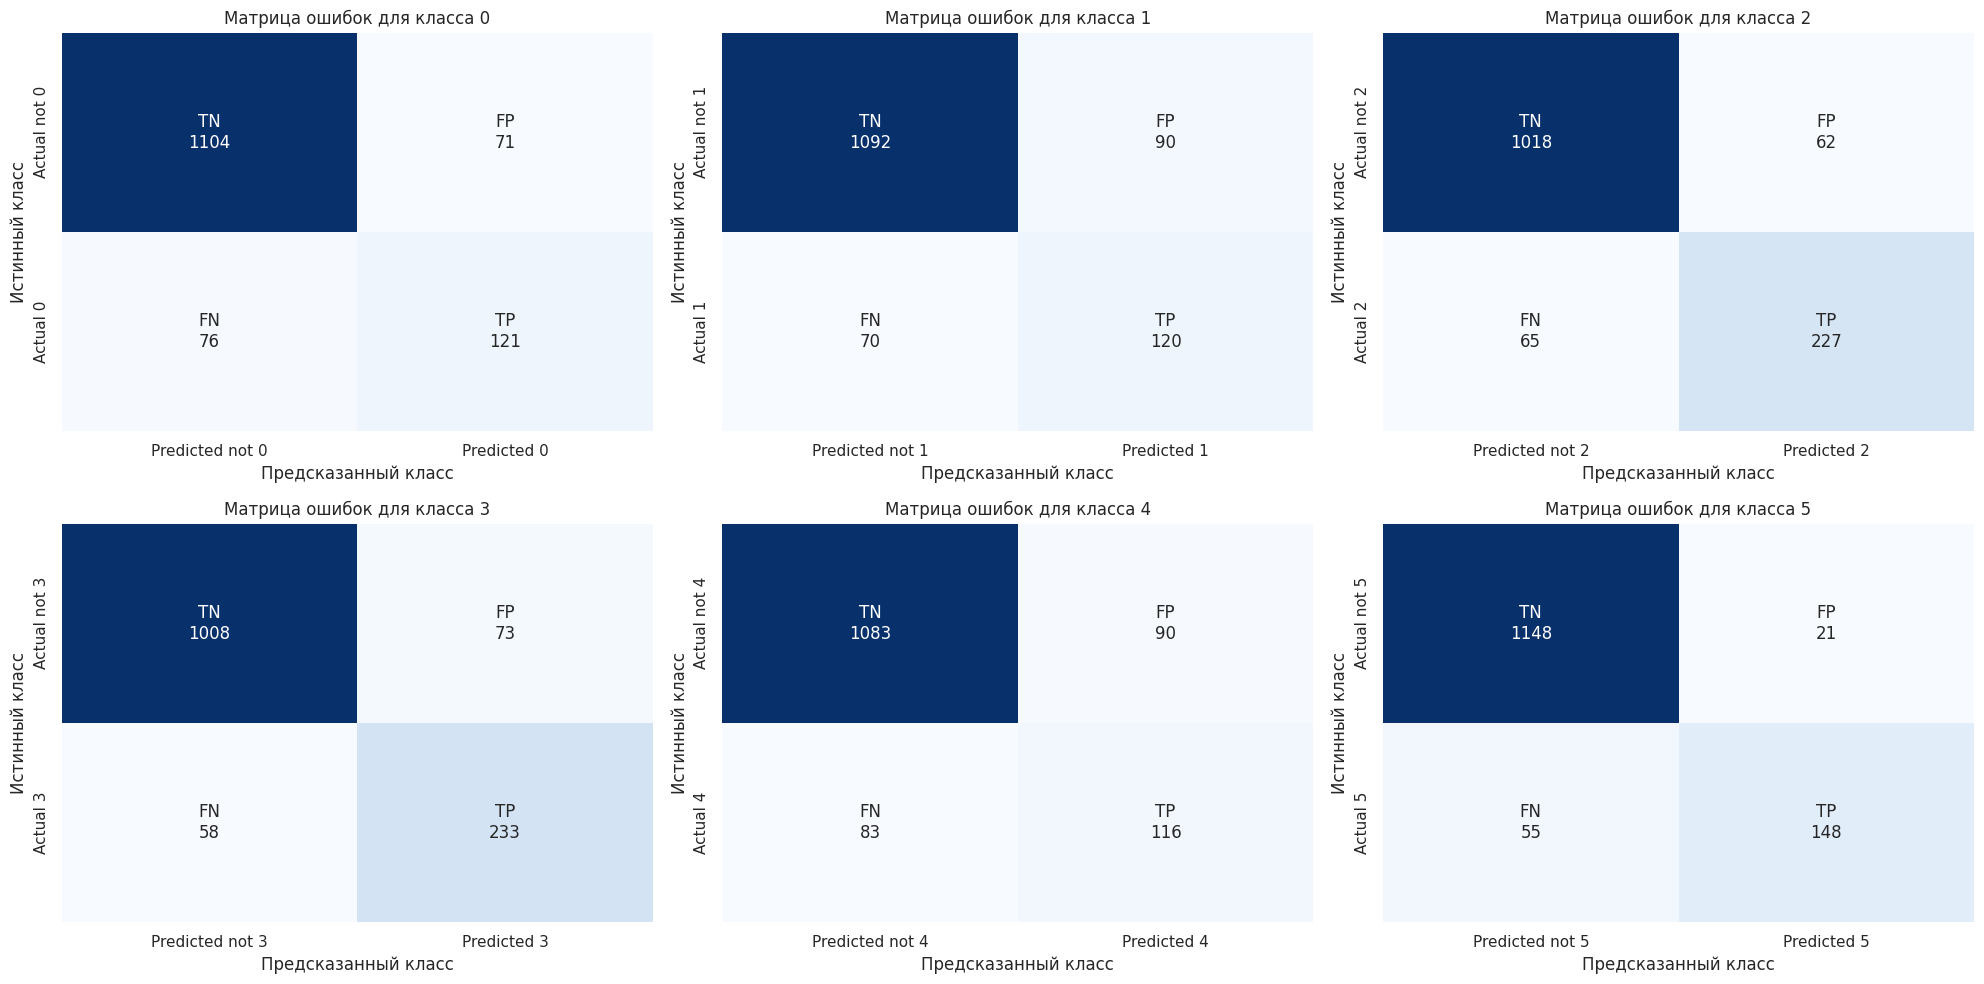

In [43]:
num_classes = 6

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i in range(num_classes):
    y_true_binary = [1 if y == i else 0 for y in y_true]
    y_pred_binary = [1 if y == i else 0 for y in y_pred]

    cm = confusion_matrix(y_true_binary, y_pred_binary, labels=[0,1])

    # Убедимся, что cm - 2x2
    if cm.shape != (2,2):
        # Создаем пустую матрицу 2x2 и копируем туда cm
        cm_full = np.zeros((2,2), dtype=int)
        for r in range(cm.shape[0]):
            for c in range(cm.shape[1]):
                cm_full[r,c] = cm[r,c]
        cm = cm_full

    TN, FP, FN, TP = cm.ravel()

    labels = np.array([
        [f'TN\n{TN}', f'FP\n{FP}'],
        [f'FN\n{FN}', f'TP\n{TP}']
    ])

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
                ax=axes[i],
                xticklabels=['Predicted not ' + str(i), 'Predicted ' + str(i)],
                yticklabels=['Actual not ' + str(i), 'Actual ' + str(i)])

    axes[i].set_xlabel('Предсказанный класс')
    axes[i].set_ylabel('Истинный класс')
    axes[i].set_title(f'Матрица ошибок для класса {i}')

plt.tight_layout()
plt.show()

## собираем франкенштейна

In [44]:
# Настройка базовых моделей
log_clf = LogisticRegression(random_state=42, **best_params1)
tree_clf = DecisionTreeClassifier(random_state=42, **best_params2)
forest_clf = RandomForestClassifier(random_state=42, **best_params3)

# Создание ансамбля
voting_clf = VotingClassifier(estimators=[
    ('logistic', log_clf),
    ('decision_tree', tree_clf),
    ('random_forest', forest_clf)
], voting='soft')

# Оценка производительности с помощью кросс-валидации
cv_scores = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)  # 5-кратная кросс-валидация

# Вывод результатов кросс-валидации
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average CV Score: {np.mean(cv_scores):.2f}')

# Обучение ансамбля на тренировочных данных
voting_clf.fit(X_train_scaled, y_train)

# Предсказания на тестовых данных
y_pred = voting_clf.predict(X_test_scaled)

# Оценка качества
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Cross-Validation Scores: [0.69216758 0.70218579 0.70947177 0.69006381 0.71649954]
Average CV Score: 0.70
Accuracy: 0.70
Confusion Matrix:
[[121  42   0   0  32   2]
 [ 34 118   2   1  25  10]
 [  0   0 228  62   2   0]
 [  0   0  50 240   1   0]
 [ 33  40   0   4 108  14]
 [  5  12  10   7  24 145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       197
           1       0.56      0.62      0.59       190
           2       0.79      0.78      0.78       292
           3       0.76      0.82      0.79       291
           4       0.56      0.54      0.55       199
           5       0.85      0.71      0.78       203

    accuracy                           0.70      1372
   macro avg       0.69      0.68      0.69      1372
weighted avg       0.70      0.70      0.70      1372



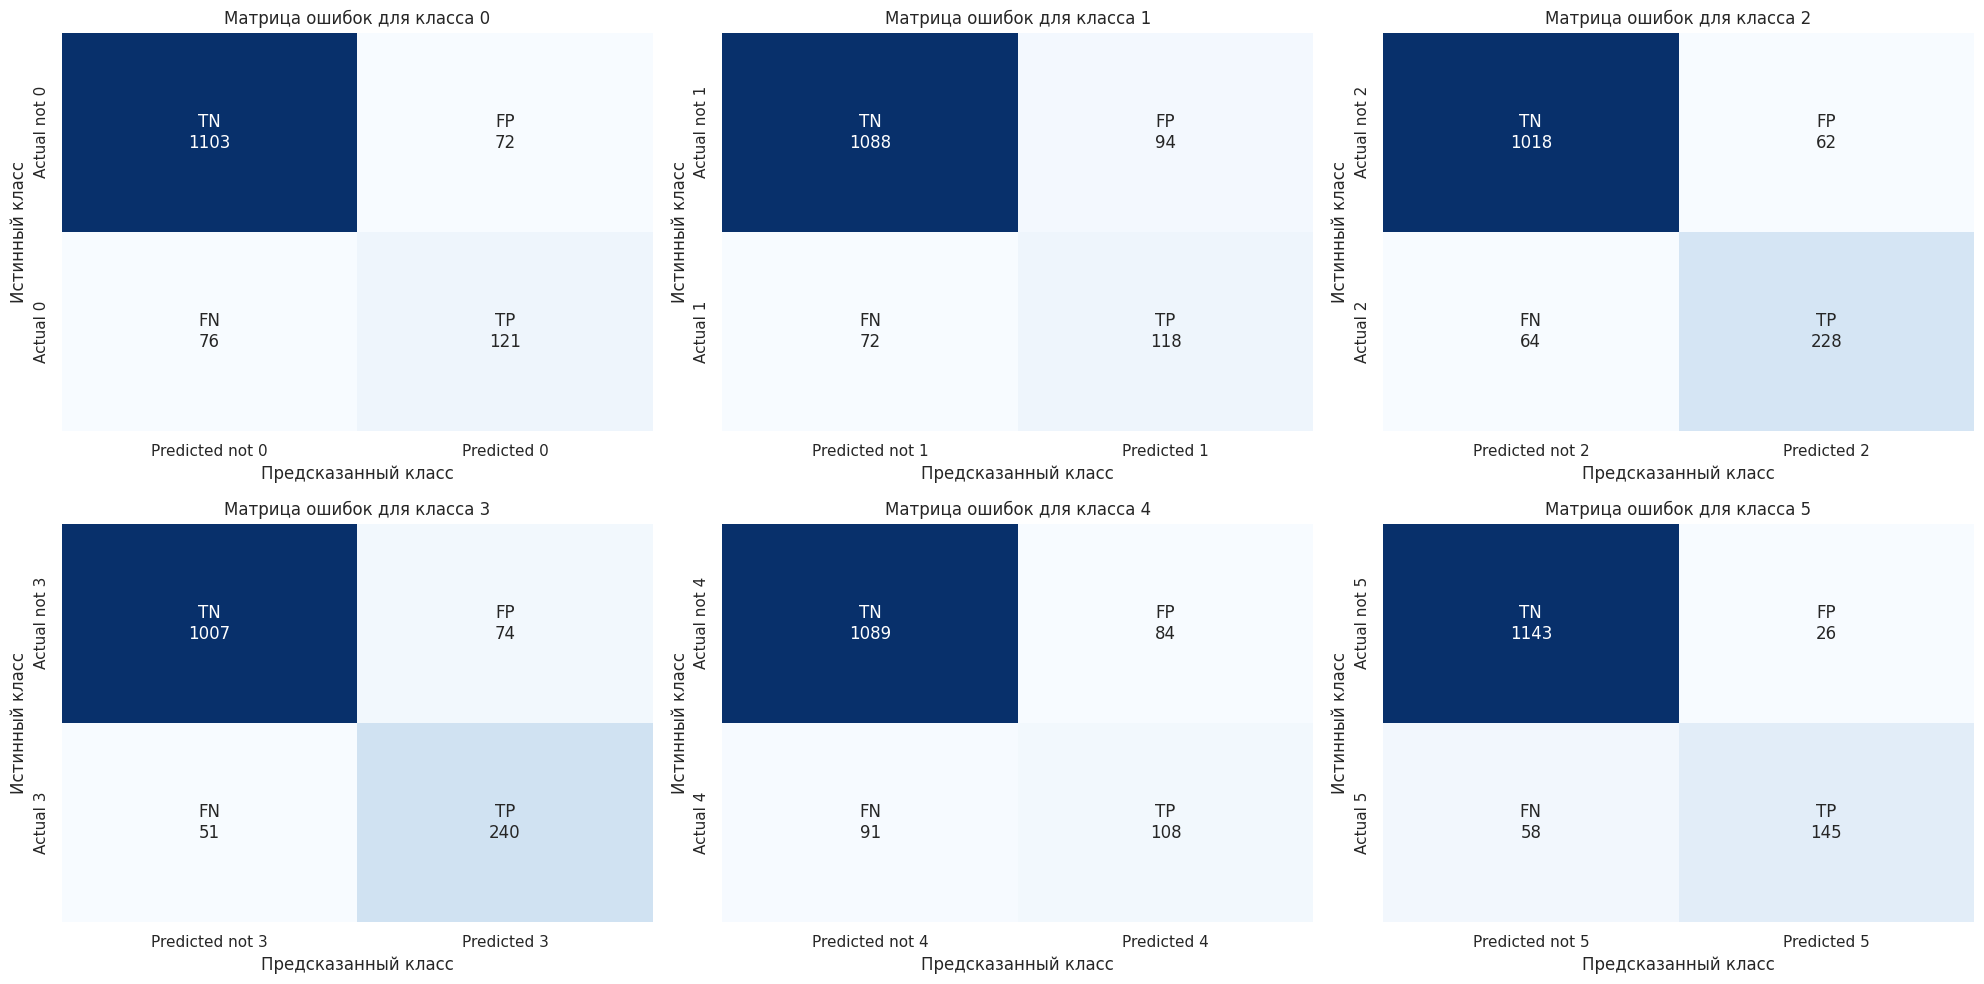

In [45]:
num_classes = 6

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i in range(num_classes):
    y_true_binary = [1 if y == i else 0 for y in y_true]
    y_pred_binary = [1 if y == i else 0 for y in y_pred]

    cm = confusion_matrix(y_true_binary, y_pred_binary, labels=[0,1])

    # Убедимся, что cm - 2x2
    if cm.shape != (2,2):
        # Создаем пустую матрицу 2x2 и копируем туда cm
        cm_full = np.zeros((2,2), dtype=int)
        for r in range(cm.shape[0]):
            for c in range(cm.shape[1]):
                cm_full[r,c] = cm[r,c]
        cm = cm_full

    TN, FP, FN, TP = cm.ravel()

    labels = np.array([
        [f'TN\n{TN}', f'FP\n{FP}'],
        [f'FN\n{FN}', f'TP\n{TP}']
    ])

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
                ax=axes[i],
                xticklabels=['Predicted not ' + str(i), 'Predicted ' + str(i)],
                yticklabels=['Actual not ' + str(i), 'Actual ' + str(i)])

    axes[i].set_xlabel('Предсказанный класс')
    axes[i].set_ylabel('Истинный класс')
    axes[i].set_title(f'Матрица ошибок для класса {i}')

plt.tight_layout()
plt.show()

Факир был пьян, фокус не удался. В целом моя модель догнала AutoML, так что результат есть

# Интерпретация

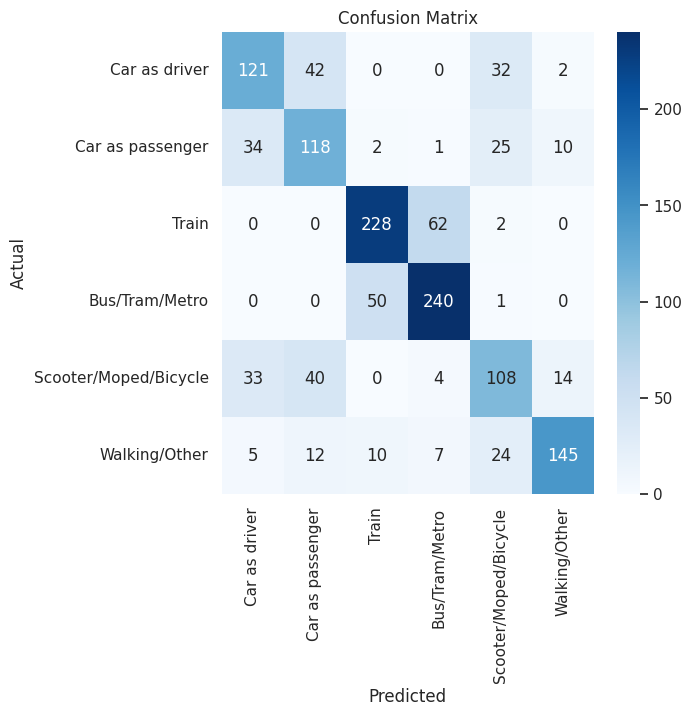

In [46]:
# матрица ошибок

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Car as driver', 'Car as passenger', 'Train', 'Bus/Tram/Metro', 'Scooter/Moped/Bicycle', 'Walking/Other'],
            yticklabels=['Car as driver', 'Car as passenger', 'Train', 'Bus/Tram/Metro', 'Scooter/Moped/Bicycle', 'Walking/Other'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

есть классы, которые предсказываются хуже, чем другие, но в целом ошибок не слишком много в соотношении с правильно предсказанными данными. можно доработать анализ стыковых вариантов (полагаю, это происходит потому, что в данных много слабых зависимостей). Путаютс классы car as driver и car as passanger, которые могут быть очень близки по сути; также путаются классы Bus/Tram/Metro и Train, которые тоже могут иметь схожие признаки, особенно учитывая, что в классе Bus/Tram/Metro и так много довольно различных видов транспорта. Класс Walking/Other распределён хаотично (это происходит в основном из-за класса Other), поэтому его может быть трудно предсказать

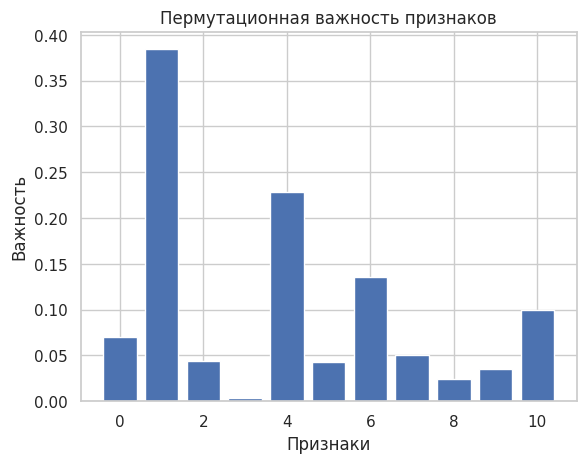

In [47]:
from sklearn.inspection import permutation_importance
# как изменится модель, если не сможет обучаться на основе рассматриваемого признака

results = permutation_importance(voting_clf, X_train_scaled, y_train, scoring='accuracy')

# Визуализация
plt.bar(range(len(results.importances_mean)), results.importances_mean)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Пермутационная важность признаков')
plt.show()


Самые важные признаки: 'количество сегментов поездки за день', 'причина поездки', 'наличие авто' и 'наличие велосипеда', что соответствует здравому смыслу: люди в повседневной жизни обычно выбирают средство передвижения, исходя из целей поездки и затрачиваемого времени (кол-во сегментов в день). Владение самыми популярными видами транспорта (автомобилем и велосипедом) также часто влияют на выбор

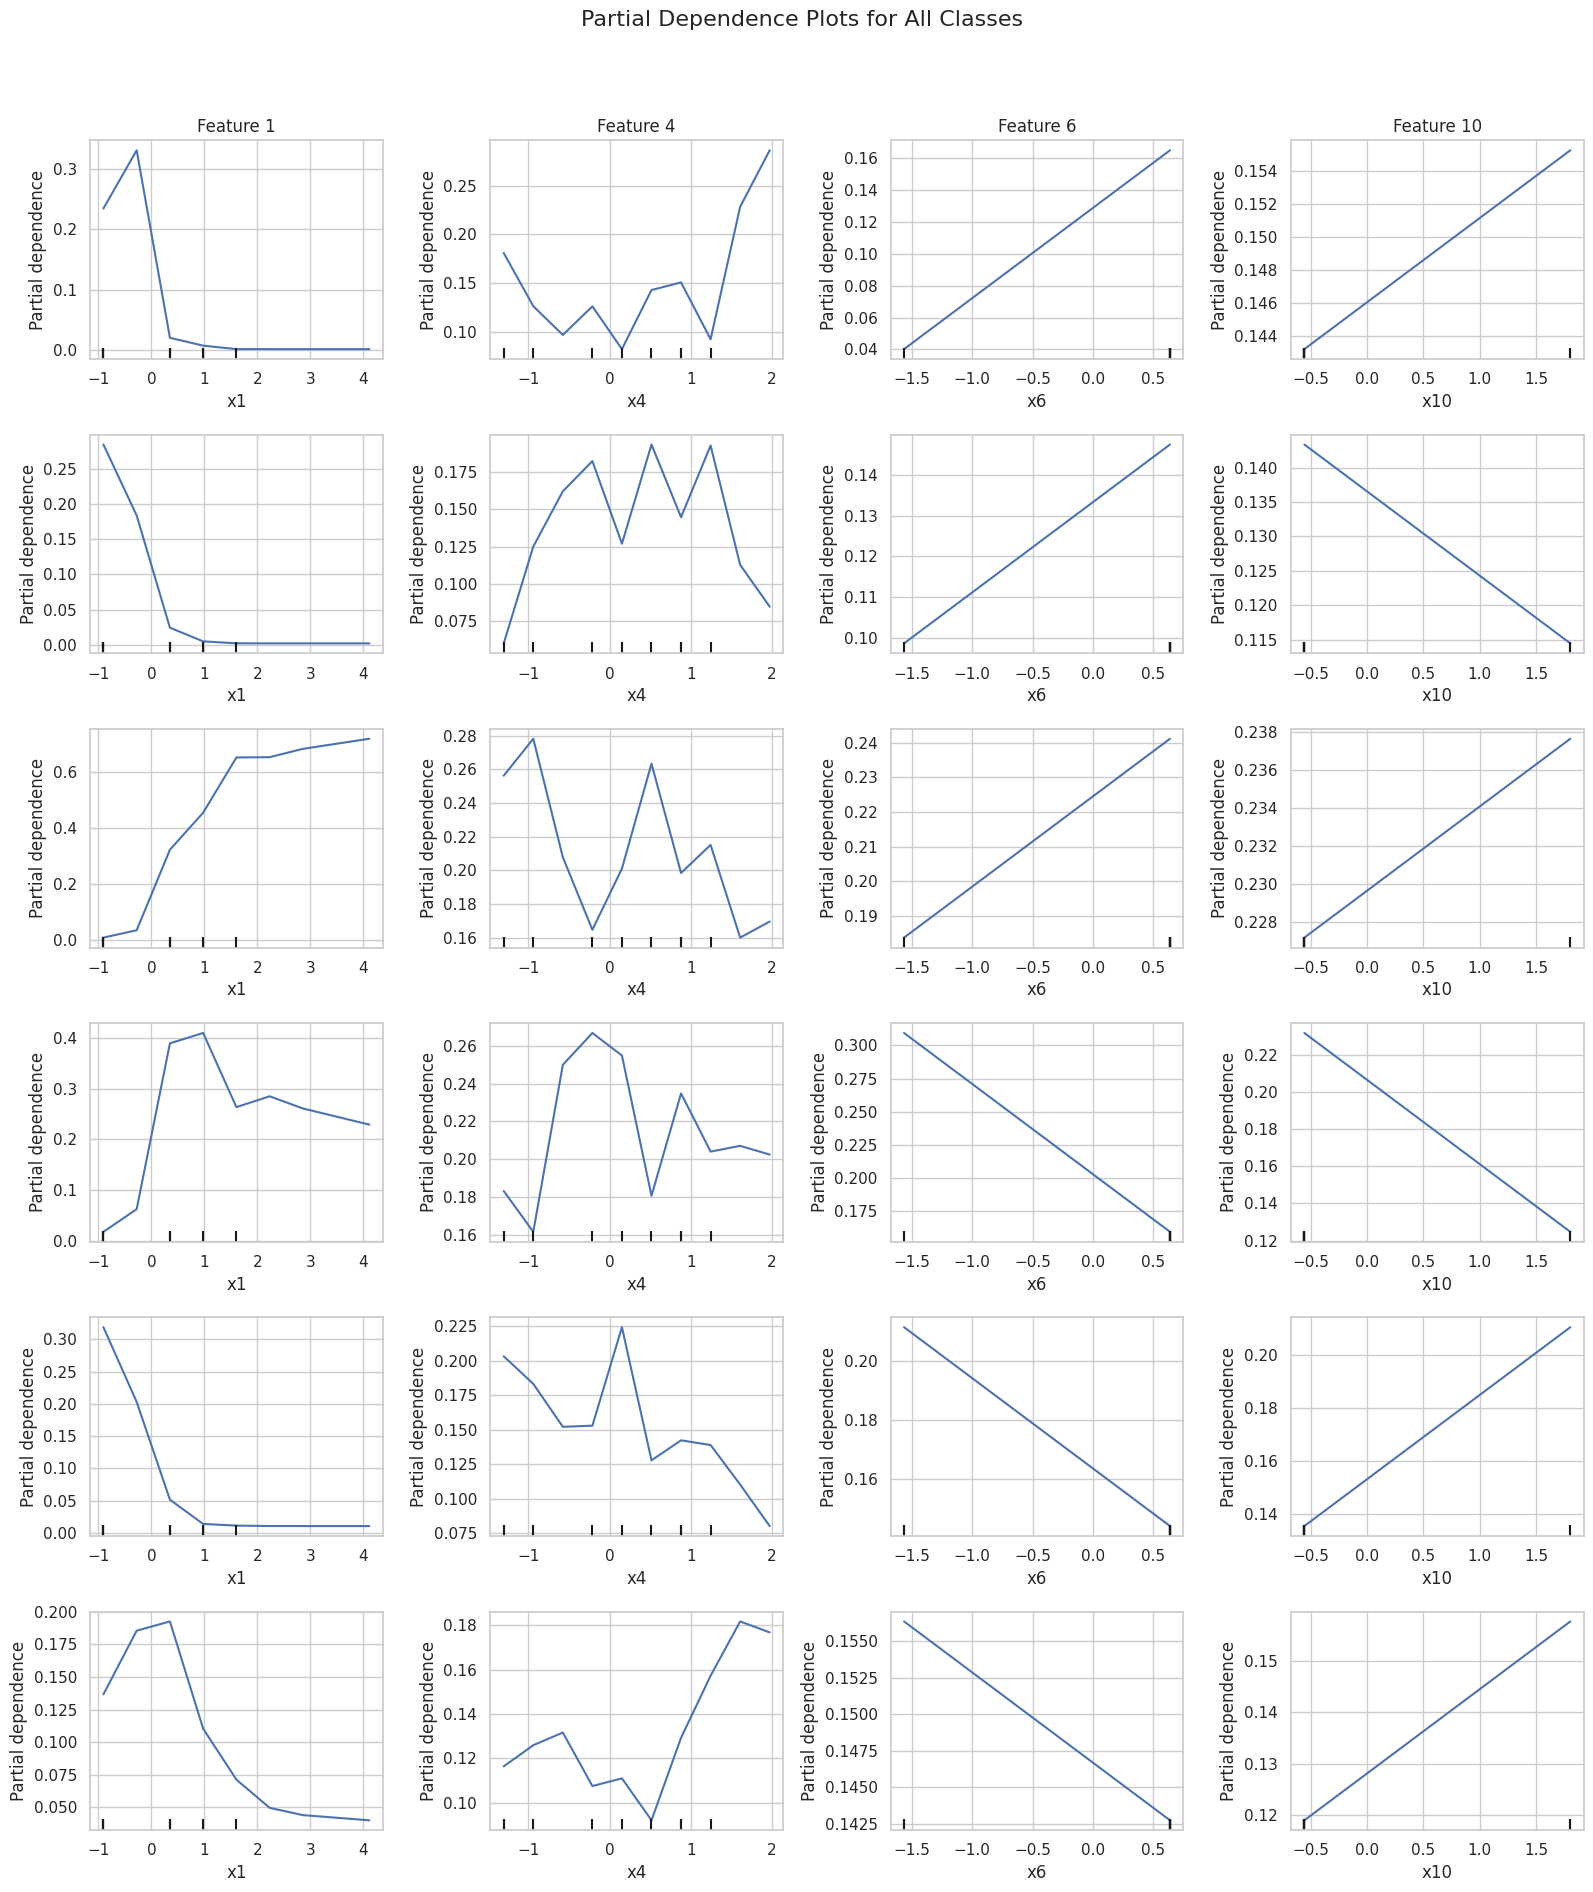

In [60]:
from sklearn.inspection import PartialDependenceDisplay

# Индексы признаков
feature_indices = [1, 4, 6, 10]

# Получение классов из обученной модели
classes = voting_clf.classes_

# Создаем фигуру с числом строк, равным числу классов, и числом столбцов, равным числу признаков
n_rows = len(classes)
n_cols = len(feature_indices)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows), squeeze=False)

# Построим PDP для каждого класса и каждого признака на соответствующем subplot
for row_idx, target_class in enumerate(classes):
    for col_idx, feature in enumerate(feature_indices):
        PartialDependenceDisplay.from_estimator(
            voting_clf,
            X_train_scaled,
            features=[feature],
            target=target_class,
            ax=axes[row_idx, col_idx]
        )
        if row_idx == 0:
            axes[row_idx, col_idx].set_title(f'Feature {feature}')
    axes[row_idx, 0].set_ylabel(f'Class {target_class}')

plt.tight_layout()
plt.suptitle('Partial Dependence Plots for All Classes', fontsize=16, y=1.05)
plt.show()

Из графиков видно, что фичи "наличие авто" и "наличие велосипеда" влияют на результаты линейно, в то время как зависимость от фичей "время поездки" и "причина поездки" непостоянно, особенно это касается "причины поездки". "Время поездки" в основном влияет на большинство классов схоже с обратной заисимостью

# Локальная интерпретация

In [68]:
from lime import lime_tabular

predictions = y_pred

# Индексы неправильно и правильно предсказанных наблюдений
wrong_predictions_index = np.where(predictions != y_true)[0]
correct_predictions_index = np.where(predictions == y_true)[0]

# Выбор одного неправильно предсказанного и двух правильно предсказанных
wrong_prediction_sample = wrong_predictions_index[0]
correct_prediction_samples = correct_predictions_index[:2]

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X),
    mode='classification',
    feature_names=X.columns,
    class_names=class_names,
    discretize_continuous=True
)

# Объяснение для неверного предсказания с фокусом на классах 2 и 3
wrong_prediction_explanation = explainer.explain_instance(
    data_row=X.iloc[wrong_prediction_sample].values,
    predict_fn=voting_clf.predict_proba,
    labels=[2, 3]
)

# Объяснение для первого правильного предсказания
correct_prediction_explanation_1 = explainer.explain_instance(
    data_row=X.iloc[correct_prediction_samples[0]].values,
    predict_fn=voting_clf.predict_proba,
    labels=[2, 3]
)

# Объяснение для второго правильного предсказания
correct_prediction_explanation_2 = explainer.explain_instance(
    data_row=X.iloc[correct_prediction_samples[1]].values,
    predict_fn=voting_clf.predict_proba,
    labels=[2, 3]
)

# Визуализация объяснений
wrong_prediction_explanation.show_in_notebook(labels=[2], show_table=True)
correct_prediction_explanation_1.show_in_notebook(labels=[2], show_table=True)
correct_prediction_explanation_2.show_in_notebook(labels=[2], show_table=True)

Рассмотрим пример: первое предсказание ошибочно, остальные два - верные. Все три объекта отнесены к классу train.
Случай 1: модель предсказала Train, но с небольшой уверенностью.
Признаки, вероятно, указывают на особенности поездки, которые модель ассоциирует с классом Train. Однако высокая вероятность Car as driver (0.26) и Walking/Other (0.21) говорит о некоторой неоднозначности. Возможно, признаки HHEBIKE=1.0 и KMOTIEF=9.0 вносят путаницу.
Случаи 2 и 3: Вероятности других классов ниже.
Признаки отличаются: в обоих примерах KMOTIEF и VERTREKP имеют значения 2 или 3, а не 9, как в первом. VERPL=3.0 против 1.0 в первом — возможно, это влияет на уверенность модели.
Модель более уверена в классе Train, вероятно потому, что признаки ближе к типичным для этого класса.